In [1]:
#Import Library
import numpy as np
import pandas as pd
import sklearn

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 2000)

In [6]:
df_train = pd.read_csv('train.csv')

In [7]:
df=pd.DataFrame(df_train)

### I have added Energetic Level for Dogs and Personality, Vocalize, and Playfullness for Cats

In [8]:
df_label = pd.read_csv('breed_labels.csv')

#df_label

In [9]:
df_state = pd.read_csv('state_labels.csv')

#df_state

### I have joined the training csv and breed_label csv based on BreedID for only Breed 1 in training data.

In [10]:
pd_train_new=pd.merge(df_train, df_label, left_on='Breed1', right_on='BreedID', how='left')
#pd_train_new

In [11]:
pd_train_new=pd.merge(pd_train_new, df_state, left_on='State', right_on='StateID', how='left')
#pd_train_new

In [12]:
#Rename the columns to avoid confusion
pd_train_new.rename(columns = {'BreedName':'BreedName B1'}, inplace = True)
pd_train_new.rename(columns = {'Energetic Level':'Energetic Level B1'}, inplace = True)
pd_train_new.rename(columns = {'Personality':'Personality B1'}, inplace = True)
pd_train_new.rename(columns = {'Vocalize':'Vocalize B1'}, inplace = True)
pd_train_new.rename(columns = {'Playfullness':'Playfulness B1'}, inplace = True)
pd_train_new.rename(columns = {'Type_x':'Type'}, inplace = True)
pd_train_new.drop(['Type_y','StateID','BreedID'],axis=1, inplace = True)
#pd_train_new

### Replace breed1 value with breed2 value when breed1 equals to 0 while breed 2 has value.

In [13]:
pd_train_new[pd_train_new['Breed1']== 0]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,BreedName B1,Energetic Level B1,Personality B1,Vocalize B1,Playfulness B1,StateName,Population
391,1,Lil Milo,2,0,26,2,2,0,0,2,1,1,1,2,1,1,0,41326,1a2113010d6048d5410b265347b35c91,0,Milo went missing after a week with her new ad...,375905770,3.0,3,NaN,NaN,NaN,NaN,NaN,Selangor,5874.1
1045,1,Bella 4 Months Puppy!,4,0,307,2,2,3,0,2,1,1,1,2,1,1,100,41326,3673e167fc9932b13149bed1f2a0180a,0,"She's only 4 months old, very friendly and lov...",da8d4a273,5.0,4,NaN,NaN,NaN,NaN,NaN,Selangor,5874.1
3219,2,NaN,3,0,266,3,1,4,7,1,1,2,1,2,1,3,0,41401,f7cff59d10c867bdee12c3f35f34d086,0,Mama cat came to house and gave birth to these...,27e74e45c,11.0,2,NaN,NaN,NaN,NaN,NaN,Kuala Lumpur,1768.0
7285,1,"""Boy Boy""",72,0,307,1,1,2,0,2,2,2,2,2,1,1,0,41326,94b991f8dc1e0bb903ca8d4d492c8d43,0,He is a stray dog found wandering around Unive...,7b5bee232,5.0,4,NaN,NaN,NaN,NaN,NaN,Selangor,5874.1
7706,1,Looking Newborn Puppy For Adoption,2,0,205,2,2,5,7,1,1,2,2,2,1,1,1,41336,5232bdd1444960a257ccec9a41404320,0,I want to adopt a newborn puppy Prefer small b...,0327b8e94,0.0,3,NaN,NaN,NaN,NaN,NaN,Johor,3553.6


In [14]:
pd_train_new['Breed1 New']=np.where((pd_train_new['Breed1']== 0) &(pd_train_new['Breed2']!=0),pd_train_new['Breed2'],pd_train_new['Breed1'])

### Next, I have created the 'Mixed Breed' indicator. If Breed1 equals to 307, or if breed1 and breed2 are not the same, then it is a mixed breed.

In [15]:
pd_train_new['MixedBreed']=np.where((pd_train_new['Breed1 New']==307)|((pd_train_new['Breed1 New']!=pd_train_new['Breed2'])&(pd_train_new['Breed2']!=0)) , '1', '0')


### Next, I have created the 'Fee Flag' indicator. If the fee is larger than 0, then it is 'Yes', else it is 'No'.

In [16]:
pd_train_new['Fee Flag']=np.where(pd_train_new['Fee']>0,'1', '0')

### Next, I have created 'Adopted Flag' indicator. If the Adoption Speed is equal to 4, then it is not adopted, otherwise it is 'Yes'.

In [17]:
pd_train_new['Adopted Flag']=np.where(pd_train_new['AdoptionSpeed']==4,'0', '1')

In [18]:
pd_train_new['Video Flag']=np.where(pd_train_new['VideoAmt']>0,'1','0')

In [19]:
pd_train_new['Photo Flag']=np.where(pd_train_new['PhotoAmt']>0,'1','0')

In [20]:
pd_train_new['Name Flag'] = np.where(pd_train_new['Name'].isnull(), 0,1 )

In [21]:
pd_train_new['Description Flag']= np.where(pd_train_new['Description'].isnull(), 0,1 )

### This is to understand what's the 1% and 99% percentile for Age.

In [22]:
pd_train_new.Age.quantile(0.99)

84.0

In [23]:
pd_train_new.Age.quantile(0.02)

1.0

### Create the new variable 'New Age', where if it is <0, than it will be equal to 1(2% percentile), >84, then it will be 99% percentile)

In [24]:
pd_train_new['New Age']=np.where(pd_train_new['Age']==0,1,pd_train_new['Age'])
pd_train_new['New Age']=np.where(pd_train_new['Age']>84,84,pd_train_new['Age'])


### Here's a summary of null values for each variable in our dataframe.

In [25]:
pd_train_new.isnull().sum()

Type                     0
Name                  1257
Age                      0
Breed1                   0
Breed2                   0
Gender                   0
Color1                   0
Color2                   0
Color3                   0
MaturitySize             0
FurLength                0
Vaccinated               0
Dewormed                 0
Sterilized               0
Health                   0
Quantity                 0
Fee                      0
State                    0
RescuerID                0
VideoAmt                 0
Description             12
PetID                    0
PhotoAmt                 0
AdoptionSpeed            0
BreedName B1             5
Energetic Level B1    6857
Personality B1        8145
Vocalize B1           8145
Playfulness B1        8145
StateName                0
Population               0
Breed1 New               0
MixedBreed               0
Fee Flag                 0
Adopted Flag             0
Video Flag               0
Photo Flag               0
N

In [26]:
print(df.describe())

               Type           Age        Breed1        Breed2        Gender        Color1        Color2        Color3  MaturitySize     FurLength    Vaccinated      Dewormed    Sterilized        Health      Quantity           Fee         State      VideoAmt      PhotoAmt  AdoptionSpeed
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   14993.000000
mean       1.457614     10.452078    265.272594     74.009738      1.776162      2.234176      3.222837      1.882012      1.862002      1.467485      1.731208      1.558727      1.914227      1.036617      1.576069     21.259988  41346.028347      0.056760      3.889215       2.516441
std        0.498217     18.155790     60.056818    123.011575      0.681592      1.745225      2.742562      2.984086      0.547959      0.

In [27]:
pd_age=pd_train_new['New Age']
pd_age.describe()

count    14993.000000
mean        10.154339
std         16.363657
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max         84.000000
Name: New Age, dtype: float64

### This is the correlation table for all original variables in training cvs.

In [28]:
df.corr()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
Type,1.000000,-0.147162,0.057724,-0.043568,0.060843,0.097680,0.246333,0.201693,-0.171811,0.003036,0.102907,0.025508,0.006737,-0.006864,0.036423,-0.042134,0.124549,-0.005967,0.049368,-0.091240
Age,-0.147162,1.000000,-0.314346,-0.041010,-0.123423,0.090378,-0.039427,-0.053546,0.093673,0.153092,-0.136061,-0.053360,-0.189450,0.103215,-0.113076,0.089168,0.024523,-0.015969,-0.084778,0.100510
Breed1,0.057724,-0.314346,1.000000,-0.157053,0.071321,-0.035510,-0.007081,-0.000682,-0.010507,-0.108059,0.046518,0.013216,0.052698,-0.034893,0.090194,-0.189526,-0.026832,0.020626,0.043395,0.107834
Breed2,-0.043568,-0.041010,-0.157053,1.000000,0.056907,-0.020324,0.003015,0.035679,0.049879,0.106220,0.005638,-0.009817,-0.005989,-0.029285,0.038125,0.013508,-0.037993,0.001569,0.045953,-0.018642
Gender,0.060843,-0.123423,0.071321,0.056907,1.000000,-0.115351,0.026507,0.259309,-0.091819,-0.030404,0.078702,0.091431,0.040645,-0.045177,0.494489,-0.050491,0.002564,0.016816,0.098435,0.057622
Color1,0.097680,0.090378,-0.035510,-0.020324,-0.115351,1.000000,-0.113290,-0.282897,-0.029468,0.066967,-0.017475,-0.019318,-0.037050,0.024410,-0.116688,0.054180,0.024012,-0.006435,-0.041323,-0.044192
Color2,0.246333,-0.039427,-0.007081,0.003015,0.026507,-0.113290,1.000000,0.088742,-0.065155,-0.008764,0.026193,0.005812,0.007370,-0.004307,0.019876,-0.017308,0.026944,0.023983,0.059113,-0.038579
Color3,0.201693,-0.053546,-0.000682,0.035679,0.259309,-0.282897,0.088742,1.000000,-0.051730,0.013581,0.054053,0.048617,0.038899,-0.024782,0.272548,-0.019839,0.010554,0.019526,0.103662,-0.007014
MaturitySize,-0.171811,0.093673,-0.010507,0.049879,-0.091819,-0.029468,-0.065155,-0.051730,1.000000,0.095142,-0.087722,-0.067352,-0.066321,-0.012957,-0.042832,0.041144,-0.062584,0.017032,0.015593,0.045653
FurLength,0.003036,0.153092,-0.108059,0.106220,-0.030404,0.066967,-0.008764,0.013581,0.095142,1.000000,-0.006010,0.016463,0.032092,0.028096,-0.038388,0.159693,-0.029317,-0.014740,-0.031557,-0.091337


In [29]:
pd_train_new['MixedBreed']=pd_train_new['MixedBreed'].astype(str).astype(int)
pd_train_new['Fee Flag']=pd_train_new['Fee Flag'].astype(str).astype(int)
pd_train_new['Adopted Flag']=pd_train_new['Adopted Flag'].astype(str).astype(int)
pd_train_new['Video Flag']=pd_train_new['Video Flag'].astype(str).astype(int)
pd_train_new['Photo Flag']=pd_train_new['Photo Flag'].astype(str).astype(int)

In [30]:
pd_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 40 columns):
Type                  14993 non-null int64
Name                  13736 non-null object
Age                   14993 non-null int64
Breed1                14993 non-null int64
Breed2                14993 non-null int64
Gender                14993 non-null int64
Color1                14993 non-null int64
Color2                14993 non-null int64
Color3                14993 non-null int64
MaturitySize          14993 non-null int64
FurLength             14993 non-null int64
Vaccinated            14993 non-null int64
Dewormed              14993 non-null int64
Sterilized            14993 non-null int64
Health                14993 non-null int64
Quantity              14993 non-null int64
Fee                   14993 non-null int64
State                 14993 non-null int64
RescuerID             14993 non-null object
VideoAmt              14993 non-null int64
Description           14981 n

### This is the correlation table for all new variables we have.

In [31]:
pd_train_new.corr()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,Vocalize B1,Playfulness B1,Population,Breed1 New,MixedBreed,Fee Flag,Adopted Flag,Video Flag,Photo Flag,Name Flag,Description Flag,New Age
Type,1.000000,-0.147162,0.057724,-0.043568,0.060843,0.097680,0.246333,0.201693,-0.171811,0.003036,0.102907,0.025508,0.006737,-0.006864,0.036423,-0.042134,0.124549,-0.005967,0.049368,-0.091240,NaN,NaN,-0.048444,0.057336,-0.668290,0.026887,0.041032,0.001626,0.008123,-0.015834,-0.016610,-0.154420
Age,-0.147162,1.000000,-0.314346,-0.041010,-0.123423,0.090378,-0.039427,-0.053546,0.093673,0.153092,-0.136061,-0.053360,-0.189450,0.103215,-0.113076,0.089168,0.024523,-0.015969,-0.084778,0.100510,-0.115895,-0.122176,-0.018512,-0.314389,-0.118895,0.048670,-0.110439,-0.025971,-0.032351,0.051276,-0.007350,0.975302
Breed1,0.057724,-0.314346,1.000000,-0.157053,0.071321,-0.035510,-0.007081,-0.000682,-0.010507,-0.108059,0.046518,0.013216,0.052698,-0.034893,0.090194,-0.189526,-0.026832,0.020626,0.043395,0.107834,-0.263377,-0.161556,-0.005105,0.997205,0.281357,-0.099961,-0.102662,0.025980,0.043207,-0.030822,-0.001207,-0.335632
Breed2,-0.043568,-0.041010,-0.157053,1.000000,0.056907,-0.020324,0.003015,0.035679,0.049879,0.106220,0.005638,-0.009817,-0.005989,-0.029285,0.038125,0.013508,-0.037993,0.001569,0.045953,-0.018642,-0.229552,-0.262302,0.055619,-0.155483,0.405563,0.035425,0.028090,-0.011672,0.004195,0.037473,0.000961,-0.040521
Gender,0.060843,-0.123423,0.071321,0.056907,1.000000,-0.115351,0.026507,0.259309,-0.091819,-0.030404,0.078702,0.091431,0.040645,-0.045177,0.494489,-0.050491,0.002564,0.016816,0.098435,0.057622,0.043495,0.028737,-0.021504,0.071851,0.016330,-0.055227,-0.043473,0.005346,-0.017938,-0.120534,0.011468,-0.130727
Color1,0.097680,0.090378,-0.035510,-0.020324,-0.115351,1.000000,-0.113290,-0.282897,-0.029468,0.066967,-0.017475,-0.019318,-0.037050,0.024410,-0.116688,0.054180,0.024012,-0.006435,-0.041323,-0.044192,-0.057368,-0.087750,-0.023196,-0.036136,-0.117274,0.065127,0.024673,-0.001876,-0.017469,0.022114,0.005149,0.095715
Color2,0.246333,-0.039427,-0.007081,0.003015,0.026507,-0.113290,1.000000,0.088742,-0.065155,-0.008764,0.026193,0.005812,0.007370,-0.004307,0.019876,-0.017308,0.026944,0.023983,0.059113,-0.038579,0.023290,0.047415,-0.009069,-0.007082,-0.167003,0.000456,0.036686,0.020544,0.028872,-0.001746,-0.014900,-0.043366
Color3,0.201693,-0.053546,-0.000682,0.035679,0.259309,-0.282897,0.088742,1.000000,-0.051730,0.013581,0.054053,0.048617,0.038899,-0.024782,0.272548,-0.019839,0.010554,0.019526,0.103662,-0.007014,0.035878,0.039871,-0.001931,-0.000234,-0.114040,-0.005990,-0.000508,0.015461,-0.010530,-0.053093,0.012318,-0.054595
MaturitySize,-0.171811,0.093673,-0.010507,0.049879,-0.091819,-0.029468,-0.065155,-0.051730,1.000000,0.095142,-0.087722,-0.067352,-0.066321,-0.012957,-0.042832,0.041144,-0.062584,0.017032,0.015593,0.045653,-0.092719,-0.088205,0.051057,-0.011181,0.169903,0.030418,-0.022822,0.010284,0.019549,0.056454,-0.011432,0.102296
FurLength,0.003036,0.153092,-0.108059,0.106220,-0.030404,0.066967,-0.008764,0.013581,0.095142,1.000000,-0.006010,0.016463,0.032092,0.028096,-0.038388,0.159693,-0.029317,-0.014740,-0.031557,-0.091337,-0.217837,-0.234346,0.026860,-0.108743,-0.016240,0.105644,0.055806,-0.016442,-0.020603,0.027972,-0.001536,0.165461


In [32]:
ADS_Type=df.groupby(["AdoptionSpeed","Type" ]).size()
ADS_Type

AdoptionSpeed  Type
0              1        170
               2        240
1              1       1435
               2       1655
2              1       2164
               2       1873
3              1       1949
               2       1310
4              1       2414
               2       1783
dtype: int64

### We could see that Most Cats and Dogs have been adopted.

In [33]:
ADS_Type1=pd_train_new.groupby(["Adopted Flag","Type"]).size().to_frame('Count')
ADS_Type1['Percentage%']=ADS_Type1['Count']/ADS_Type1['Count'].sum()*100
ADS_Type1.sort_values(by='Count', ascending=False)

Count  Percentage%
Adopted Flag Type                    
1            1      5718    38.137798
             2      5078    33.869139
0            1      2414    16.100847
             2      1783    11.892216

In [34]:
Freq_Type=pd_train_new.groupby(["Type"]).size().to_frame('Count')
Freq_Type['Percentage%']=Freq_Type['Count']/Freq_Type['Count'].sum()*100
Freq_Type.sort_values(by='Count', ascending=False)

,Count,Percentage%
Type,,
1,8132,54.238645
2,6861,45.761355


In [35]:
Freq_Type=df.groupby(["Type" ]).size()
Freq_Type

Type
1    8132
2    6861
dtype: int64

In [36]:
type_adp=pd.crosstab(pd_train_new["Type"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
type_adp

Adopted Flag,0,1
Type,,
1,0.296852,0.703148
2,0.259875,0.740125


In [37]:
type_adp1=pd.crosstab(pd_train_new["Type"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
type_adp1

AdoptionSpeed,0,1,2,3,4
Type,,,,,
1,0.020905,0.176463,0.266109,0.239670,0.296852
2,0.034980,0.241218,0.272992,0.190934,0.259875


In [38]:
ADS_Age=df.groupby(["Age","AdoptionSpeed" ]).size().to_frame('Count')
ADS_Age['Percentage%']=ADS_Age['Count']/ADS_Age['Count'].sum()*100
ADS_Age.sort_values(by='Count', ascending=False)

Count  Percentage%
Age AdoptionSpeed                    
2   2               1120     7.470153
    1                865     5.769359
    3                783     5.222437
1   2                754     5.029014
    1                643     4.288668
2   4                620     4.135263
3   2                586     3.908491
1   3                511     3.408257
3   4                470     3.134796
    3                458     3.054759
12  4                428     2.854666
3   1                408     2.721270
4   4                349     2.327753
1   4                342     2.281064
24  4                285     1.900887
4   2                265     1.767491
    3                260     1.734143
6   4                226     1.507370
4   1                211     1.407323
12  2                200     1.333956
5   4                196     1.307277
12  3                185     1.233909
36  4                183     1.220570
5   2                157     1.047155
24  3                143     0.953778
5   3                135     0.900420
8   4                131     0.873741
12  1                121     0.807043
6   2                117     0.780364
2   0                115     0.767025
6   3                115     0.767025
24  1                110     0.733676
7   4                110     0.733676
5   1                100     0.666978
24  2                 97     0.646969
48  4                 92     0.613620
6   1                 80     0.533582
36  2                 78     0.520243
    1                 77     0.513573
9   4                 73     0.486894
36  3                 71     0.473554
8   3                 70     0.466885
    2                 68     0.453545
7   3                 62     0.413526
10  4                 61     0.406857
7   2                 59     0.393517
48  2                 58     0.386847
18  4                 58     0.386847
60  4                 54     0.360168
1   0                 54     0.360168
9   2                 51     0.340159
0   1                 50     0.333489
60  2                 48     0.320149
11  4                 48     0.320149
48  1                 47     0.313480
60  3                 46     0.306810
    1                 45     0.300140
0   2                 44     0.293470
3   0                 44     0.293470
7   1                 43     0.286801
48  3                 42     0.280131
0   3                 39     0.260121
18  2                 38     0.253452
10  2                 37     0.246782
0   4                 36     0.240112
8   1                 36     0.240112
14  4                 35     0.233442
10  3                 34     0.226772
18  3                 34     0.226772
72  4                 33     0.220103
12  0                 33     0.220103
84  3                 31     0.206763
    4                 31     0.206763
9   3                 31     0.206763
15  4                 30     0.200093
72  2                 30     0.200093
17  4                 29     0.193424
72  3                 28     0.186754
18  1                 27     0.180084
16  4                 26     0.173414
84  2                 26     0.173414
10  1                 26     0.173414
4   0                 24     0.160075
9   1                 24     0.160075
6   0                 20     0.133396
11  3                 18     0.120056
13  4                 18     0.120056
15  2                 17     0.113386
11  2                 17     0.113386
15  1                 16     0.106716
14  3                 16     0.106716
30  3                 16     0.106716
24  0                 16     0.106716
120 4                 15     0.100047
15  3                 14     0.093377
96  4                 14     0.093377
84  1                 13     0.086707
20  4                 13     0.086707
21  4                 13     0.086707
30  4                 13     0.086707
19  4                 12     0.080037
17  3                 12     0.080037
    2                 12     0.080037
14  1                 11     

In [39]:
ADS_Age1=pd_train_new.groupby(["Adopted Flag","New Age"]).size().to_frame('Count')
ADS_Age1['Percentage%']=ADS_Age1['Count']/ADS_Age1['Count'].sum()*100
ADS_Age1.sort_values(by='Count', ascending=False)


Count  Percentage%
Adopted Flag New Age                    
1            2         2883    19.228974
             1         1962    13.086107
             3         1496     9.977990
             4          760     5.069032
0            2          620     4.135263
1            12         539     3.595011
0            3          470     3.134796
             12         428     2.854666
1            5          399     2.661242
             24         366     2.441139
0            4          349     2.327753
             1          342     2.281064
1            6          332     2.214367
0            24         285     1.900887
1            36         234     1.560728
0            6          226     1.507370
             5          196     1.307277
             36         183     1.220570
1            8          178     1.187221
             7          171     1.140532
             84         158     1.053825
             48         149     0.993797
             60         145     0.967118
             0          143     0.953778
0            8          131     0.873741
1            9          111     0.740345
0            7          110     0.733676
1            18         107     0.713666
             10         101     0.673648
0            48          92     0.613620
             84          85     0.566931
             9           73     0.486894
1            72          71     0.473554
0            10          61     0.406857
             18          58     0.386847
             60          54     0.360168
1            15          49     0.326819
0            11          48     0.320149
1            11          46     0.306810
             14          41     0.273461
             30          39     0.260121
             17          38     0.253452
0            0           36     0.240112
             14          35     0.233442
             72          33     0.220103
             15          30     0.200093
             17          29     0.193424
             16          26     0.173414
1            16          24     0.160075
             13          22     0.146735
             20          19     0.126726
0            13          18     0.120056
1            29          15     0.100047
             21          15     0.100047
             19          14     0.093377
0            20          13     0.086707
             30          13     0.086707
             21          13     0.086707
             19          12     0.080037
1            42          12     0.080037
             54          12     0.080037
             22          11     0.073368
0            29          10     0.066698
             42          10     0.066698
             26          10     0.066698
1            27           9     0.060028
             32           9     0.060028
0            27           8     0.053358
             22           8     0.053358
1            28           8     0.053358
             41           6     0.040019
0            32           6     0.040019
1            53           6     0.040019
             37           5     0.033349
             38           5     0.033349
0            31           5     0.033349
             25           5     0.033349
1            62           5     0.033349
             25           5     0.033349
0            28           5     0.033349
1            23           4     0.026679
             31           4     0.026679
             46           4     0.026679
0            55           4     0.026679
1            50           4     0.026679
0            50           4     0.026679
1            51           4     0.026679
             65           4     0.026679
0            41           4     0.026679
             23           4     0.026679
             39           4     0.026679
1            52           4     0.026679
0            51           3     0.020009
             49           3     0.020009
1            64           3     0.020009
             49           3     0.020009
    

In [40]:
Freq_Age=df.groupby(["Age"]).size().to_frame('Count')
Freq_Age['Percentage%']=Freq_Age['Count']/Freq_Age['Count'].sum()*100
Freq_Age.sort_values(by='Count', ascending=False)

,Count,Percentage%
Age,,
2,3503,23.364237
1,2304,15.367171
3,1966,13.112786
4,1109,7.396785
12,967,6.449677
24,651,4.342026
5,595,3.968519
6,558,3.721737
36,417,2.781298


In [41]:
ADS_Gender=df.groupby(["AdoptionSpeed","Gender" ]).size()
ADS_Gender

AdoptionSpeed  Gender
0              1          160
               2          204
               3           46
1              1         1283
               2         1366
               3          441
2              1         1578
               2         1911
               3          548
3              1         1109
               2         1671
               3          479
4              1         1406
               2         2125
               3          666
dtype: int64

In [42]:
ADS_Gender1=pd_train_new.groupby(["Adopted Flag","Gender"]).size()
ADS_Gender1

Adopted Flag  Gender
0             1         1406
              2         2125
              3          666
1             1         4130
              2         5152
              3         1514
dtype: int64

In [43]:
Freq_Gender=df.groupby(["Gender" ]).size()
Freq_Gender

Gender
1    5536
2    7277
3    2180
dtype: int64

In [44]:
gender_adp=pd.crosstab(pd_train_new["Gender"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
gender_adp

Adopted Flag,0,1
Gender,,
1,0.253974,0.746026
2,0.292016,0.707984
3,0.305505,0.694495


In [45]:
gender_adp1=pd.crosstab(pd_train_new["Gender"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
gender_adp1

AdoptionSpeed,0,1,2,3,4
Gender,,,,,
1,0.028902,0.231756,0.285043,0.200325,0.253974
2,0.028034,0.187715,0.262608,0.229628,0.292016
3,0.021101,0.202294,0.251376,0.219725,0.305505


In [46]:
ADS_MatureSize1=pd_train_new.groupby(["Adopted Flag","MaturitySize"]).size().to_frame('Count')
ADS_MatureSize1['Percentage%']=ADS_MatureSize1['Count']/ADS_MatureSize1['Count'].sum()*100
ADS_MatureSize1.sort_values(by='Count',ascending=False)


Count  Percentage%
Adopted Flag MaturitySize                    
1            2              7332    48.902821
0            2              2973    19.829254
1            1              2534    16.901221
             3               900     6.002801
0            1               861     5.742680
             3               360     2.401121
1            4                30     0.200093
0            4                 3     0.020009

In [47]:
Freq_MatureSize=df.groupby(["MaturitySize" ]).size().to_frame('Count')
Freq_MatureSize['Percentage%']=Freq_MatureSize['Count']/Freq_MatureSize['Count'].sum()*100
Freq_MatureSize.sort_values(by='Count',ascending=False)

,Count,Percentage%
MaturitySize,,
2,10305,68.732075
1,3395,22.643900
3,1260,8.403922
4,33,0.220103


In [48]:
size_adp=pd.crosstab(pd_train_new["MaturitySize"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
size_adp

Adopted Flag,0,1
MaturitySize,,
1,0.253608,0.746392
2,0.288501,0.711499
3,0.285714,0.714286
4,0.090909,0.909091


In [49]:
size_adp1=pd.crosstab(pd_train_new["MaturitySize"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
size_adp1

AdoptionSpeed,0,1,2,3,4
MaturitySize,,,,,
1,0.040943,0.256259,0.260383,0.188807,0.253608
2,0.021931,0.185250,0.275303,0.229015,0.288501
3,0.034127,0.241270,0.242063,0.196825,0.285714
4,0.060606,0.212121,0.333333,0.303030,0.090909


In [50]:
ADS_FurLength=df.groupby(["AdoptionSpeed","FurLength" ]).size()
ADS_FurLength

AdoptionSpeed  FurLength
0              1             194
               2             160
               3              56
1              1            1649
               2            1187
               3             254
2              1            2372
               2            1444
               3             221
3              1            1994
               2            1111
               3             154
4              1            2599
               2            1459
               3             139
dtype: int64

In [51]:
ADS_FurLength1=pd_train_new.groupby(["Adopted Flag","FurLength" ]).size()
ADS_FurLength1

Adopted Flag  FurLength
0             1            2599
              2            1459
              3             139
1             1            6209
              2            3902
              3             685
dtype: int64

In [52]:
Freq_FurLength=df.groupby(["FurLength" ]).size()
Freq_FurLength

FurLength
1    8808
2    5361
3     824
dtype: int64

In [53]:
furlength_adp=pd.crosstab(pd_train_new["FurLength"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
furlength_adp

Adopted Flag,0,1
FurLength,,
1,0.295073,0.704927
2,0.272151,0.727849
3,0.168689,0.831311


In [54]:
furlength_adp1=pd.crosstab(pd_train_new["FurLength"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
furlength_adp1

AdoptionSpeed,0,1,2,3,4
FurLength,,,,,
1,0.022025,0.187216,0.269301,0.226385,0.295073
2,0.029845,0.221414,0.269353,0.207237,0.272151
3,0.067961,0.308252,0.268204,0.186893,0.168689


In [55]:
ADS_Vaccinated=df.groupby(["AdoptionSpeed","Vaccinated" ]).size()
ADS_Vaccinated

AdoptionSpeed  Vaccinated
0              1              146
               2              206
               3               58
1              1              965
               2             1777
               3              348
2              1             1473
               2             2112
               3              452
3              1             1419
               2             1459
               3              381
4              1             1895
               2             1673
               3              629
dtype: int64

In [56]:
ADS_Vaccinated1=pd_train_new.groupby(["Adopted Flag","Vaccinated" ]).size()
ADS_Vaccinated1

Adopted Flag  Vaccinated
0             1             1895
              2             1673
              3              629
1             1             4003
              2             5554
              3             1239
dtype: int64

In [57]:
Freq_Vaccinated=df.groupby(["Vaccinated" ]).size()
Freq_Vaccinated

Vaccinated
1    5898
2    7227
3    1868
dtype: int64

In [58]:
vaccine_adp=pd.crosstab(pd_train_new["Vaccinated"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
vaccine_adp

Adopted Flag,0,1
Vaccinated,,
1,0.321295,0.678705
2,0.231493,0.768507
3,0.336724,0.663276


In [59]:
vaccine_adp1=pd.crosstab(pd_train_new["Vaccinated"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
vaccine_adp1

AdoptionSpeed,0,1,2,3,4
Vaccinated,,,,,
1,0.024754,0.163615,0.249746,0.240590,0.321295
2,0.028504,0.245883,0.292237,0.201882,0.231493
3,0.031049,0.186296,0.241970,0.203961,0.336724


In [60]:
ADS_Dewormed=df.groupby(["AdoptionSpeed","Dewormed" ]).size()
ADS_Dewormed

AdoptionSpeed  Dewormed
0              1            205
               2            146
               3             59
1              1           1572
               2           1188
               3            330
2              1           2273
               2           1347
               3            417
3              1           1988
               2            914
               3            357
4              1           2359
               2           1220
               3            618
dtype: int64

In [61]:
ADS_Dewormed1=pd_train_new.groupby(["Adopted Flag","Dewormed"]).size()
ADS_Dewormed1

Adopted Flag  Dewormed
0             1           2359
              2           1220
              3            618
1             1           6038
              2           3595
              3           1163
dtype: int64

In [62]:
Freq_Dewormed=df.groupby(["Dewormed" ]).size()
Freq_Dewormed

Dewormed
1    8397
2    4815
3    1781
dtype: int64

In [63]:
dewormed_adp=pd.crosstab(pd_train_new["Dewormed"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
dewormed_adp

Adopted Flag,0,1
Dewormed,,
1,0.280934,0.719066
2,0.253375,0.746625
3,0.346996,0.653004


In [64]:
dewormed_adp=pd.crosstab(pd_train_new["Dewormed"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
dewormed_adp

AdoptionSpeed,0,1,2,3,4
Dewormed,,,,,
1,0.024413,0.187210,0.270692,0.236751,0.280934
2,0.030322,0.246729,0.279751,0.189823,0.253375
3,0.033127,0.185289,0.234138,0.200449,0.346996


In [65]:
ADS_Sterilized=df.groupby(["AdoptionSpeed","Sterilized" ]).size()
ADS_Sterilized

AdoptionSpeed  Sterilized
0              1               70
               2              270
               3               70
1              1              364
               2             2378
               3              348
2              1              656
               2             3022
               3              359
3              1              720
               2             2251
               3              288
4              1             1291
               2             2156
               3              750
dtype: int64

In [66]:
ADS_Sterilized1=pd_train_new.groupby(["Adopted Flag","Sterilized"]).size()
ADS_Sterilized1

Adopted Flag  Sterilized
0             1             1291
              2             2156
              3              750
1             1             1810
              2             7921
              3             1065
dtype: int64

In [67]:
Freq_Sterilized=df.groupby(["Sterilized" ]).size()
Freq_Sterilized

Sterilized
1     3101
2    10077
3     1815
dtype: int64

In [68]:
sterilized_adp=pd.crosstab(pd_train_new["Sterilized"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
sterilized_adp

Adopted Flag,0,1
Sterilized,,
1,0.416317,0.583683
2,0.213953,0.786047
3,0.413223,0.586777


In [69]:
sterilized_adp1=pd.crosstab(pd_train_new["Sterilized"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
sterilized_adp1

AdoptionSpeed,0,1,2,3,4
Sterilized,,,,,
1,0.022573,0.117381,0.211545,0.232183,0.416317
2,0.026794,0.235983,0.299891,0.223380,0.213953
3,0.038567,0.191736,0.197796,0.158678,0.413223


In [70]:
ADS_Health=df.groupby(["AdoptionSpeed","Health" ]).size()
ADS_Health

AdoptionSpeed  Health
0              1          392
               2           17
               3            1
1              1         2999
               2           89
               3            2
2              1         3925
               2          106
               3            6
3              1         3150
               2           98
               3           11
4              1         4012
               2          171
               3           14
dtype: int64

In [71]:
ADS_Health1=pd_train_new.groupby(["Adopted Flag","Health"]).size()
ADS_Health1

Adopted Flag  Health
0             1          4012
              2           171
              3            14
1             1         10466
              2           310
              3            20
dtype: int64

In [72]:
Freq_Health=df.groupby(["Health" ]).size()
Freq_Health

Health
1    14478
2      481
3       34
dtype: int64

In [73]:
health_adp=pd.crosstab(pd_train_new["Health"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
health_adp

Adopted Flag,0,1
Health,,
1,0.277110,0.722890
2,0.355509,0.644491
3,0.411765,0.588235


In [74]:
health_adp1=pd.crosstab(pd_train_new["Health"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
health_adp1

AdoptionSpeed,0,1,2,3,4
Health,,,,,
1,0.027076,0.207142,0.271101,0.217571,0.277110
2,0.035343,0.185031,0.220374,0.203742,0.355509
3,0.029412,0.058824,0.176471,0.323529,0.411765


In [75]:
ADS_State=df.groupby(["AdoptionSpeed","State" ]).size()
ADS_State

AdoptionSpeed  State
0              41324       4
               41325       3
               41326     246
               41327       8
               41330       3
               41332       4
               41335       3
               41336      23
               41342       1
               41345       1
               41367       2
               41401     112
1              41324      18
               41325      14
               41326    1877
               41327     122
               41330      48
               41332      36
               41335      29
               41336     113
               41342       1
               41345       6
               41361       9
               41367       3
               41401     814
2              41324      23
               41325      34
               41326    2435
               41327     216
               41330     111
               41332      63
               41335      14
               41336     136
               41345  

In [76]:
ADS_State1=pd_train_new.groupby(["Adopted Flag","StateName" ]).size()
ADS_State1

Adopted Flag  StateName      
0             Johor               132
              Kedah                36
              Kelantan              6
              Kuala Lumpur       1192
              Labuan                1
              Melaka               80
              Negeri Sembilan     108
              Pahang               23
              Perak               141
              Pulau Pinang        300
              Sabah                 8
              Sarawak               9
              Selangor           2152
              Terengganu            9
1             Johor               375
              Kedah                74
              Kelantan              9
              Kuala Lumpur       2653
              Labuan                2
              Melaka               57
              Negeri Sembilan     145
              Pahang               62
              Perak               279
              Pulau Pinang        543
              Sabah                14
              Sarawa

In [77]:
Freq_State=pd_train_new.groupby(["StateName","State"]).size().to_frame('Count')
Freq_State.sort_values(by="Count",ascending=False)

,,Count
StateName,State,
Selangor,41326,8714
Kuala Lumpur,41401,3845
Pulau Pinang,41327,843
Johor,41336,507
Perak,41330,420
Negeri Sembilan,41332,253
Melaka,41324,137
Kedah,41325,110
Pahang,41335,85


In [78]:
state_adp=pd.crosstab(pd_train_new["StateName"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
state_adp

Adopted Flag,0,1
StateName,,
Johor,0.260355,0.739645
Kedah,0.327273,0.672727
Kelantan,0.400000,0.600000
Kuala Lumpur,0.310013,0.689987
Labuan,0.333333,0.666667
Melaka,0.583942,0.416058
Negeri Sembilan,0.426877,0.573123
Pahang,0.270588,0.729412
Perak,0.335714,0.664286


In [79]:
state_adp1=pd.crosstab(pd_train_new["StateName"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
state_adp1

AdoptionSpeed,0,1,2,3,4
StateName,,,,,
Johor,0.045365,0.222880,0.268245,0.203156,0.260355
Kedah,0.027273,0.127273,0.309091,0.209091,0.327273
Kelantan,0.133333,0.200000,0.200000,0.066667,0.400000
Kuala Lumpur,0.029129,0.211704,0.259038,0.190117,0.310013
Labuan,0.000000,0.000000,0.333333,0.333333,0.333333
Melaka,0.029197,0.131387,0.167883,0.087591,0.583942
Negeri Sembilan,0.015810,0.142292,0.249012,0.166008,0.426877
Pahang,0.035294,0.341176,0.164706,0.188235,0.270588
Perak,0.007143,0.114286,0.264286,0.278571,0.335714


### This is a table where we count the Breed in our training set. We can see most of the breed are Mixed Breed. Please note this table still has both cats and dogs.

In [80]:
Freq_BreedName=pd_train_new.groupby(["BreedName B1"]).size().to_frame('Count')
Freq_BreedName.sort_values(by='Count', ascending=False)

,Count
BreedName B1,
Mixed Breed,5927
Domestic Short Hair,3634
Domestic Medium Hair,1258
Tabby,342
Domestic Long Hair,296
Siamese,264
Persian,221
Labrador Retriever,205
Shih Tzu,190


### For further analysis about energetic level, vocalize, personality, and playfulness. Let's split the dataset to Dogs only and Cats only.

In [81]:
pd_train_new_dog=pd_train_new.loc[df['Type'] == 1]
#pd_train_new_dog

In [82]:
pd_train_new_cat=pd_train_new.loc[df['Type'] == 2]
#pd_train_new_cat

### Let's look at the table below(Dogs only), we are able to see the top 3 breed in our training set are Labrador Retriever, Shih Tzu and Poodle (besides the Mixed Breed).

In [83]:
Freq_EnergetyLvl=pd_train_new_dog.groupby(["Energetic Level B1","BreedName B1"]).size().to_frame('Count')
Freq_EnergetyLvl.sort_values(by='Count', ascending=False)

,,Count
Energetic Level B1,BreedName B1,
N.A.,Mixed Breed,5923
Needs a Lot of Activity,Labrador Retriever,205
Regular Exercise,Shih Tzu,189
Energetic,Poodle,167
Other,Terrier,161
Needs a Lot of Activity,Golden Retriever,151
Regular Exercise,German Shepherd Dog,98
Energetic,Beagle,90
Other,Spitz,89


### This is the Enegertic Level group by Adoption Speed. We could see most of the mixed breed are never adopted.(2027)


In [84]:
ADS_EnergetyLvl=pd_train_new_dog.groupby(["Energetic Level B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_EnergetyLvl.sort_values(by='Count', ascending=False)

Count
Energetic Level B1       AdoptionSpeed       
N.A.                     4               2027
                         2               1575
                         3               1381
                         1                859
Regular Exercise         1                224
                         2                213
Needs a Lot of Activity  3                189
Regular Exercise         3                168
Needs a Lot of Activity  2                166
                         1                148
Energetic                1                147
                         2                122
                         3                113
Needs a Lot of Activity  4                107
Regular Exercise         4                106
Energetic                4                105
Other                    3                 83
N.A.                     0                 81
Other                    2                 72
                         4                 60
                         1                 42
Energetic                0                 31
Regular Exercise         0                 28
Needs a Lot of Activity  0                 25
Calm                     2                 15
                         1                 14
                         3                 12
                         4                  6
Other                    0                  4
Calm                     0                  1

In [85]:
ADS_EnergetyLvl1=pd_train_new_dog.groupby(["Energetic Level B1","Adopted Flag"]).size().to_frame('Count')
ADS_EnergetyLvl1.sort_values(by='Count', ascending=False)

Count
Energetic Level B1       Adopted Flag       
N.A.                     1              3896
                         0              2027
Regular Exercise         1               633
Needs a Lot of Activity  1               528
Energetic                1               413
Other                    1               201
Needs a Lot of Activity  0               107
Regular Exercise         0               106
Energetic                0               105
Other                    0                60
Calm                     1                42
                         0                 6

### Next, we look at the cat's personality. Do note, that Breed Name like domestic *** are kind of mixed breed or not purebreed cats.

In [86]:
Freq_Personality=pd_train_new_cat.groupby(["Personality B1","BreedName B1"]).size().to_frame('Count')
Freq_Personality.sort_values(by='Count', ascending=False)

Count
Personality B1 BreedName B1                                
Other          Domestic Short Hair                     3634
               Domestic Medium Hair                    1258
               Tabby                                    342
               Domestic Long Hair                       296
Affectionate   Siamese                                  264
               Persian                                  221
Other          Calico                                   105
Even Tempered  American Shorthair                        94
Affectionate   Oriental Short Hair                       73
Other          Bengal                                    71
               Tuxedo                                    56
               Tortoiseshell                             42
Active         Maine Coon                                34
Quiet          British Shorthair                         34
Active         Abyssinian                                28
Quiet          Russian Blue                              26
Affectionate   Burmese                                   23
Other          Tiger                                     21
Intelligent    Bobtail                                   19
Affectionate   Oriental Long Hair                        17
Energetic      American Curl                             17
Affectionate   Ragdoll                                   16
               Bombay                                    14
               Singapura                                 13
Sweet          Turkish Van                                8
Quiet          Manx                                       8
Busy           Turkish Angora                             7
Affectionate   Javanese                                   7
Other          Oriental Tabby                             7
Quiet          Exotic Shorthair                           6
Intelligent    Japanese Bobtail                           6
Affectionate   Korat                                      5
Active         Norwegian Forest Cat                       5
               Somali                                     5
Other          Snowshoe                                   5
Vocal          Tonkinese                                  5
Other          Burmilla                                   5
Even Tempered  American Wirehair                          5
Active         Balinese                                   4
Other          Silver                                     4
               Dilute Calico                              3
Active         Egyptian Mau                               3
Other          Nebelung                                   3
Powerful       Siberian                                   3
Affectionate   Himalayan                                  3
Other          Dilute Tortoiseshell                       3
Active         Applehead Siamese                          2
               Ocicat                                     2
Other          Extra-Toes Cat (Hemingway Polydactyl)      2
Affectionate   Havana                                     2
Other          Cymric                                     2
Affectionate   Birman                                     2
               Chartreux                                  2
Other          Torbie                                     1
               Pixie-Bob                                  1
               Chausie                                    1
Affectionate   Ragamuffin                                 1
               Scottish Fold                              1
Active         Sphynx (hairless cat)                      1

### Unlike mixed breed dogs, there are more non-purebreed cats are adopted faster which could indicates that people might not that care about purebreed or mixed breed for cats.

In [87]:
ADS_Personality=pd_train_new_cat.groupby(["Personality B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_Personality.sort_values(by='Count', ascending=False)

Count
Personality B1 AdoptionSpeed       
Other          2               1621
               4               1539
               1               1368
               3               1153
Affectionate   1                207
Other          0                181
Affectionate   2                167
               4                145
               3                102
               0                 43
Even Tempered  4                 38
Active         1                 25
Quiet          2                 24
               1                 23
Even Tempered  1                 22
               2                 21
Active         2                 21
               4                 18
Even Tempered  3                 15
Active         3                 15
Quiet          4                 13
Intelligent    4                 11
Quiet          3                 11
Energetic      2                  6
Intelligent    2                  6
Active         0                  5
Energetic      3                  5
Intelligent    3                  4
Energetic      4                  4
Intelligent    1                  4
Busy           2                  4
Even Tempered  0                  3
Vocal          1                  3
Sweet          4                  3
Quiet          0                  3
Sweet          3                  3
Busy           4                  3
Sweet          2                  1
Vocal          2                  1
Energetic      0                  1
Sweet          0                  1
Energetic      1                  1
Powerful       4                  1
               1                  1
               0                  1
Vocal          3                  1

In [88]:
ADS_Personality1=pd_train_new_cat.groupby(["Personality B1","Adopted Flag"]).size().to_frame('Count')
ADS_Personality1.sort_values(by='Count', ascending=False)

Count
Personality B1 Adopted Flag       
Other          1              4323
               0              1539
Affectionate   1               519
               0               145
Active         1                66
Quiet          1                61
Even Tempered  1                61
               0                38
Active         0                18
Intelligent    1                14
Quiet          0                13
Energetic      1                13
Intelligent    0                11
Sweet          1                 5
Vocal          1                 5
Energetic      0                 4
Busy           1                 4
               0                 3
Sweet          0                 3
Powerful       1                 2
               0                 1

In [89]:
Freq_Vocalize=pd_train_new_cat.groupby(["Vocalize B1","BreedName B1"]).size().to_frame('Count')
Freq_Vocalize.sort_values(by='Count', ascending=False)

Count
Vocalize B1 BreedName B1                                
9.0         Domestic Short Hair                     3634
            Domestic Medium Hair                    1258
            Tabby                                    342
            Domestic Long Hair                       296
5.0         Siamese                                  264
3.0         Persian                                  221
9.0         Calico                                   105
            American Shorthair                        94
1.0         Oriental Short Hair                       73
2.0         Bengal                                    71
9.0         Tuxedo                                    56
            Tortoiseshell                             42
4.0         Maine Coon                                34
            British Shorthair                         34
9.0         Abyssinian                                28
            Russian Blue                              26
            Burmese                                   23
            Tiger                                     21
3.0         Bobtail                                   19
5.0         American Curl                             17
1.0         Oriental Long Hair                        17
4.0         Ragdoll                                   16
3.0         Bombay                                    14
5.0         Singapura                                 13
2.0         Manx                                       8
9.0         Turkish Van                                8
            Oriental Tabby                             7
            Turkish Angora                             7
1.0         Javanese                                   7
5.0         Exotic Shorthair                           6
1.0         Japanese Bobtail                           6
5.0         Korat                                      5
4.0         Norwegian Forest Cat                       5
9.0         American Wirehair                          5
            Burmilla                                   5
2.0         Snowshoe                                   5
1.0         Tonkinese                                  5
9.0         Somali                                     5
            Silver                                     4
1.0         Balinese                                   4
9.0         Dilute Tortoiseshell                       3
            Himalayan                                  3
            Nebelung                                   3
2.0         Siberian                                   3
9.0         Dilute Calico                              3
2.0         Egyptian Mau                               3
5.0         Chartreux                                  2
4.0         Birman                                     2
2.0         Cymric                                     2
            Ocicat                                     2
9.0         Havana                                     2
            Extra-Toes Cat (Hemingway Polydactyl)      2
5.0         Applehead Siamese                          2
9.0         Ragamuffin                                 1
            Sphynx (hairless cat)                      1
            Chausie                                    1
            Torbie                                     1
3.0         Pixie-Bob                                  1
4.0         Scottish Fold                              1

### The following table indicates that peoply might not care whether a cat has high vocalize score or they might have limited knowledge whether a breed of cats like to 'meow' a lot.

In [90]:
ADS_Vocalize=pd_train_new_cat.groupby(["Vocalize B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_Vocalize.sort_values(by='Count', ascending=False)

Count
Vocalize B1 AdoptionSpeed       
9.0         2               1653
            4               1579
            1               1394
            3               1178
            0                182
5.0         1                 91
            2                 84
3.0         1                 81
5.0         4                 63
3.0         2                 61
5.0         3                 52
3.0         4                 50
1.0         4                 45
3.0         3                 43
1.0         1                 33
4.0         2                 30
            1                 28
2.0         1                 27
            2                 25
            4                 24
3.0         0                 20
1.0         2                 19
5.0         0                 19
4.0         4                 14
            3                 13
1.0         3                 12
2.0         3                 11
4.0         0                  7
2.0         0                  7
1.0         0                  3

In [91]:
ADS_Vocalize1=pd_train_new_cat.groupby(["Vocalize B1","Adopted Flag"]).size().to_frame('Count')
ADS_Vocalize1.sort_values(by='Count', ascending=False)

Count
Vocalize B1 Adopted Flag       
9.0         1              4407
            0              1579
5.0         1               246
3.0         1               205
4.0         1                78
2.0         1                70
1.0         1                67
5.0         0                63
3.0         0                50
1.0         0                45
2.0         0                24
4.0         0                14

In [92]:
Freq_Playfulness=pd_train_new_cat.groupby(["Playfulness B1","BreedName B1"]).size().to_frame('Count')
Freq_Playfulness.sort_values(by='Count', ascending=False)

Count
Playfulness B1 BreedName B1                                
9.0            Domestic Short Hair                     3634
               Domestic Medium Hair                    1258
               Tabby                                    342
               Domestic Long Hair                       296
4.0            Siamese                                  264
2.0            Persian                                  221
9.0            Calico                                   105
2.0            American Shorthair                        94
9.0            Oriental Short Hair                       73
5.0            Bengal                                    71
9.0            Tuxedo                                    56
               Tortoiseshell                             42
4.0            Maine Coon                                34
2.0            British Shorthair                         34
5.0            Abyssinian                                28
2.0            Russian Blue                              26
4.0            Burmese                                   23
9.0            Tiger                                     21
4.0            Bobtail                                   19
9.0            Oriental Long Hair                        17
4.0            American Curl                             17
               Ragdoll                                   16
               Bombay                                    14
               Singapura                                 13
               Turkish Van                                8
3.0            Manx                                       8
9.0            Oriental Tabby                             7
5.0            Turkish Angora                             7
4.0            Javanese                                   7
5.0            Japanese Bobtail                           6
4.0            Exotic Shorthair                           6
5.0            Burmilla                                   5
               Snowshoe                                   5
               Somali                                     5
               Tonkinese                                  5
9.0            Norwegian Forest Cat                       5
               Korat                                      5
3.0            American Wirehair                          5
9.0            Silver                                     4
4.0            Balinese                                   4
9.0            Dilute Tortoiseshell                       3
4.0            Nebelung                                   3
1.0            Himalayan                                  3
4.0            Egyptian Mau                               3
5.0            Siberian                                   3
9.0            Dilute Calico                              3
               Cymric                                     2
3.0            Havana                                     2
9.0            Extra-Toes Cat (Hemingway Polydactyl)      2
4.0            Birman                                     2
9.0            Ocicat                                     2
3.0            Chartreux                                  2
4.0            Applehead Siamese                          2
9.0            Torbie                                     1
4.0            Sphynx (hairless cat)                      1
               Pixie-Bob                                  1
9.0            Chausie                                    1
4.0            Scottish Fold                              1
3.0            Ragamuffin                                 1

### Smilarly,  people may not care much about whether a cat is playful or may lack related knowledge.

In [93]:
ADS_Playfulness=pd_train_new_cat.groupby(["Playfulness B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_Playfulness['Percentage%']=ADS_Playfulness['Count']/ADS_Playfulness['Count'].sum()*100
ADS_Playfulness.sort_values(by='Count', ascending=False)

Count  Percentage%
Playfulness B1 AdoptionSpeed                    
9.0            2               1622    23.685748
               4               1552    22.663551
               1               1374    20.064252
               3               1153    16.837033
               0                178     2.599299
4.0            1                121     1.766939
2.0            1                119     1.737734
4.0            2                117     1.708528
               4                101     1.474883
2.0            2                 90     1.314252
               4                 80     1.168224
4.0            3                 73     1.066005
2.0            3                 60     0.876168
5.0            4                 37     0.540304
               1                 36     0.525701
               2                 34     0.496495
2.0            0                 26     0.379673
4.0            0                 26     0.379673
5.0            3                 20     0.292056
3.0            2                  8     0.116822
5.0            0                  8     0.116822
3.0            4                  5     0.073014
               3                  3     0.043808
               1                  2     0.029206
1.0            1                  2     0.029206
               2                  1     0.014603

In [94]:
ADS_Playfulness1=pd_train_new_cat.groupby(["Playfulness B1","Adopted Flag"]).size().to_frame('Count')
ADS_Playfulness1['Percentage%']=ADS_Playfulness1['Count']/ADS_Playfulness1['Count'].sum()*100
ADS_Playfulness1.sort_values(by='Count', ascending=False)

Count  Percentage%
Playfulness B1 Adopted Flag                    
9.0            1              4327    63.186332
               0              1552    22.663551
4.0            1               337     4.921145
2.0            1               295     4.307827
4.0            0               101     1.474883
5.0            1                98     1.431075
2.0            0                80     1.168224
5.0            0                37     0.540304
3.0            1                13     0.189836
               0                 5     0.073014
1.0            1                 3     0.043808

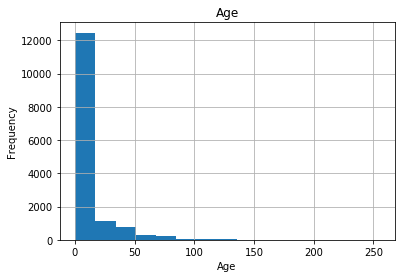

In [95]:
df.hist(column='Age', bins=15)
plt.xlabel("Age")
plt.ylabel("Frequency")

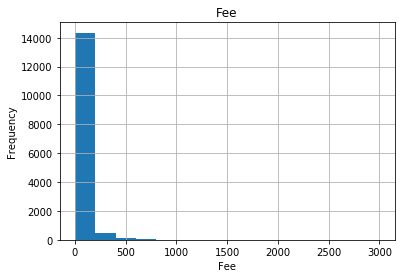

In [96]:
df.hist(column='Fee', bins='auto')

plt.xlabel("Fee")
plt.ylabel("Frequency")

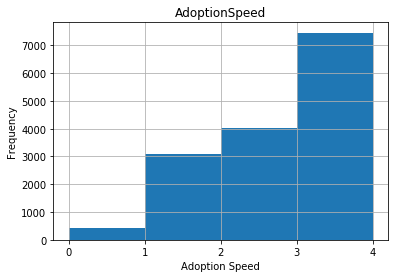

In [97]:
df.hist(column='AdoptionSpeed', bins=4)
plt.xticks(range(0, 5))
plt.xlabel("Adoption Speed")
plt.ylabel("Frequency")


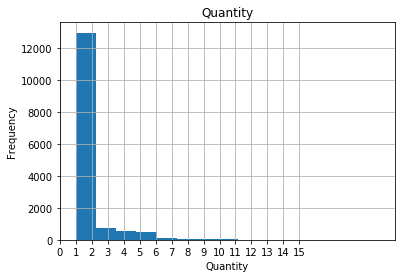

In [98]:
df.hist(column='Quantity', bins=15)
plt.xticks(range(0, 16))
plt.xlabel("Quantity")
plt.ylabel("Frequency")

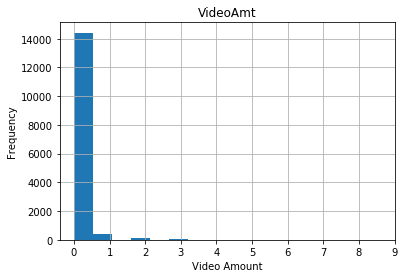

In [99]:
df.hist(column='VideoAmt', bins=15)
plt.xticks(range(0, 10))
plt.xlabel("Video Amount")
plt.ylabel("Frequency")

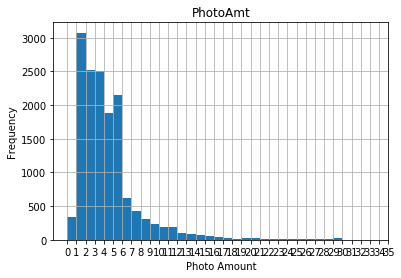

In [100]:
df.hist(column='PhotoAmt', bins=30)
plt.xticks(range(0, 36))
plt.xlabel("Photo Amount")
plt.ylabel("Frequency")

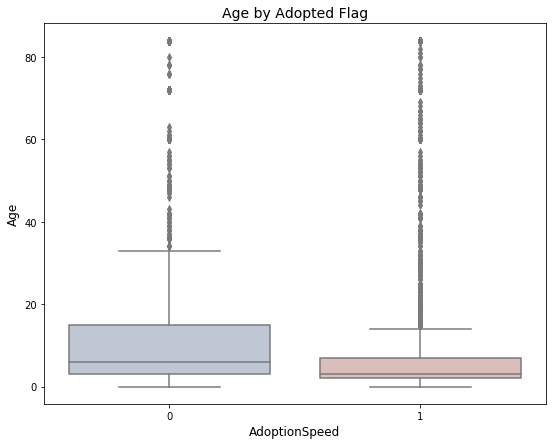

In [102]:
f, ax = plt.subplots(figsize=(9,7))
sns.boxplot(x='Adopted Flag', y='New Age', data=pd_train_new, palette='vlag')
#sns.swarmplot(x='Adopted Flag', y='New Age', data=pd_train_new, size=2, color='0.3')
plt.title('Age by Adopted Flag', size=14)
plt.xlabel('AdoptionSpeed', size=12)
plt.ylabel('Age', size=12)
plt.show()

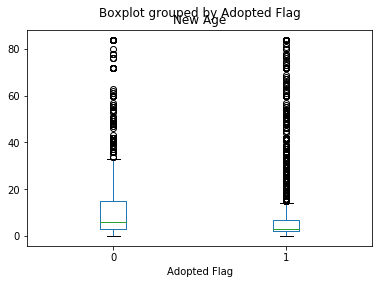

In [103]:
pd_train_new.boxplot(by='Adopted Flag', 
                       column=['New Age'], 
                       grid=False)

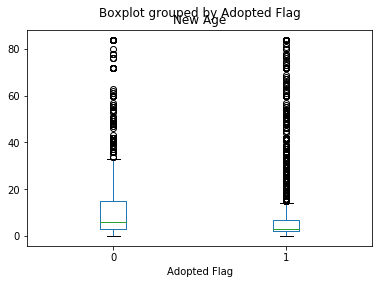

In [104]:
boxplot = pd_train_new.boxplot(by='Adopted Flag',column=['New Age'],grid=False) 

## Model 

In [105]:
pd_train_new.dtypes

Type                    int64
Name                   object
Age                     int64
Breed1                  int64
Breed2                  int64
Gender                  int64
Color1                  int64
Color2                  int64
Color3                  int64
MaturitySize            int64
FurLength               int64
Vaccinated              int64
Dewormed                int64
Sterilized              int64
Health                  int64
Quantity                int64
Fee                     int64
State                   int64
RescuerID              object
VideoAmt                int64
Description            object
PetID                  object
PhotoAmt              float64
AdoptionSpeed           int64
BreedName B1           object
Energetic Level B1     object
Personality B1         object
Vocalize B1           float64
Playfulness B1        float64
StateName              object
Population            float64
Breed1 New              int64
MixedBreed              int64
Fee Flag  

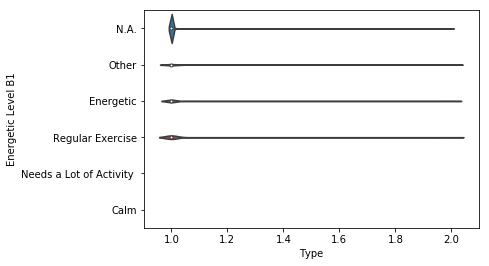

In [106]:
sns.violinplot(x='Type', y='Energetic Level B1', data=pd_train_new, split=True, scale='count')
#plt.ticklabel_format(style='plain',axis='Type',useOffset=False)

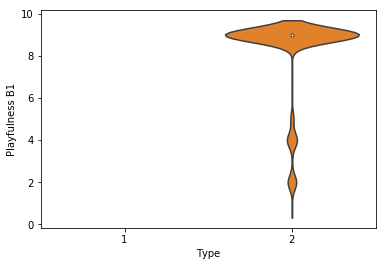

In [107]:
sns.violinplot(x='Type', y='Playfulness B1',data=pd_train_new, split=True, scale='count')

### We will split the model into dogs and cats, and then run the model separately.

In [108]:
pd_model_all=pd_train_new[['Type','New Age','Gender','Color1','Color2','Color3','MaturitySize','FurLength','Vaccinated','Dewormed','Sterilized', 'Health','Quantity','State','Fee Flag','Adopted Flag','Video Flag','Photo Flag','Name Flag','Description Flag','Personality B1','Vocalize B1','Playfulness B1','Energetic Level B1','AdoptionSpeed']]

In [109]:
pd_model_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 25 columns):
Type                  14993 non-null int64
New Age               14993 non-null int64
Gender                14993 non-null int64
Color1                14993 non-null int64
Color2                14993 non-null int64
Color3                14993 non-null int64
MaturitySize          14993 non-null int64
FurLength             14993 non-null int64
Vaccinated            14993 non-null int64
Dewormed              14993 non-null int64
Sterilized            14993 non-null int64
Health                14993 non-null int64
Quantity              14993 non-null int64
State                 14993 non-null int64
Fee Flag              14993 non-null int64
Adopted Flag          14993 non-null int64
Video Flag            14993 non-null int64
Photo Flag            14993 non-null int64
Name Flag             14993 non-null int64
Description Flag      14993 non-null int64
Personality B1        6848 non-

In [110]:
pd_model_dog=pd_model_all.loc[pd_model_all['Type'] == 1]
pd_model_dog.drop(['Personality B1','Vocalize B1','Playfulness B1'],axis=1,inplace=True)
pd_model_dog['Energetic Level B1'] = np.where(pd_model_dog['Energetic Level B1'].isnull(), 'Other', pd_model_dog['Energetic Level B1'] )
pd_model_dog['Energetic Level B1'] = np.where(pd_model_dog['Energetic Level B1']=='N.A.', 'Other', pd_model_dog['Energetic Level B1'])

In [111]:
pd_model_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8132 entries, 2 to 14992
Data columns (total 22 columns):
Type                  8132 non-null int64
New Age               8132 non-null int64
Gender                8132 non-null int64
Color1                8132 non-null int64
Color2                8132 non-null int64
Color3                8132 non-null int64
MaturitySize          8132 non-null int64
FurLength             8132 non-null int64
Vaccinated            8132 non-null int64
Dewormed              8132 non-null int64
Sterilized            8132 non-null int64
Health                8132 non-null int64
Quantity              8132 non-null int64
State                 8132 non-null int64
Fee Flag              8132 non-null int64
Adopted Flag          8132 non-null int64
Video Flag            8132 non-null int64
Photo Flag            8132 non-null int64
Name Flag             8132 non-null int64
Description Flag      8132 non-null int64
Energetic Level B1    8132 non-null object
AdoptionS

In [112]:
pd_model_dog_dummies = pd.concat([pd_model_dog, pd.get_dummies(pd_model_dog['Energetic Level B1'])], axis=1)
pd_model_dog_dummies.drop(['Energetic Level B1'],axis=1,inplace=True)
#pd_model_dog_dummies.head()

pd_model_dog_dummies = pd_model_dog_dummies.astype('int64', copy=False)
pd_model_dog_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8132 entries, 2 to 14992
Data columns (total 26 columns):
Type                        8132 non-null int64
New Age                     8132 non-null int64
Gender                      8132 non-null int64
Color1                      8132 non-null int64
Color2                      8132 non-null int64
Color3                      8132 non-null int64
MaturitySize                8132 non-null int64
FurLength                   8132 non-null int64
Vaccinated                  8132 non-null int64
Dewormed                    8132 non-null int64
Sterilized                  8132 non-null int64
Health                      8132 non-null int64
Quantity                    8132 non-null int64
State                       8132 non-null int64
Fee Flag                    8132 non-null int64
Adopted Flag                8132 non-null int64
Video Flag                  8132 non-null int64
Photo Flag                  8132 non-null int64
Name Flag                   

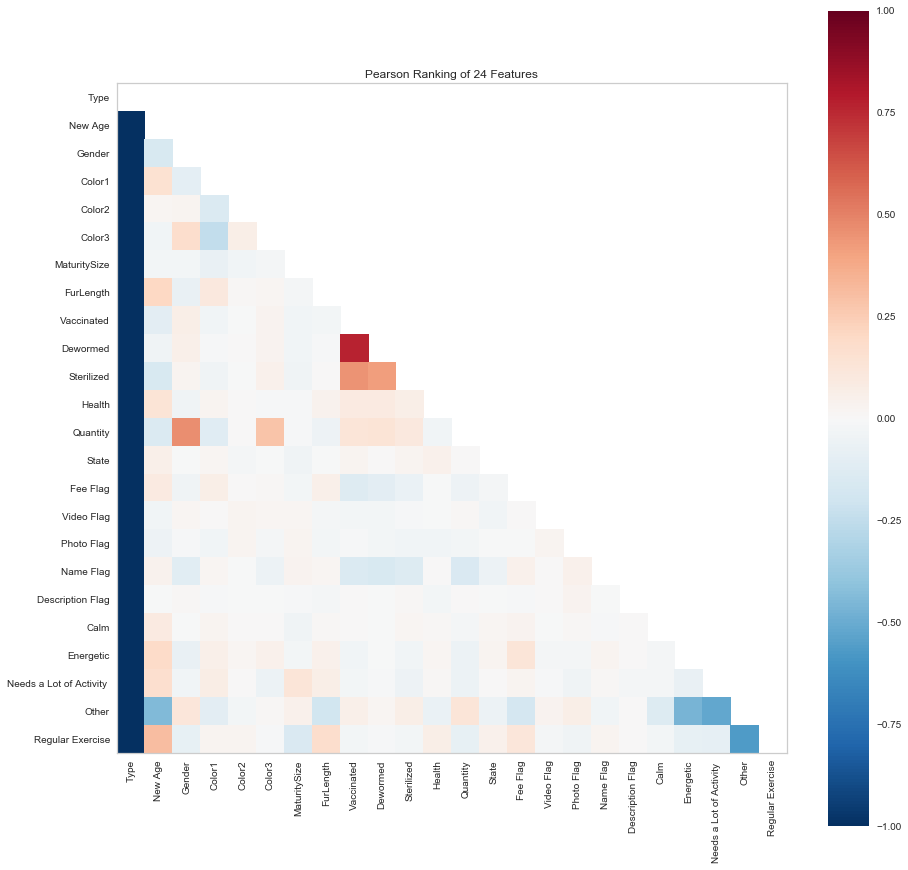

In [113]:
from yellowbrick.features import Rank2D

y_dog = pd_model_dog_dummies[['AdoptionSpeed']]
X_dog=pd_model_dog_dummies.drop(['AdoptionSpeed','Adopted Flag'],axis=1)

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', size=(1080, 1080))

visualizer.fit(X_dog, y_dog)
visualizer.transform(X_dog)
visualizer.poof()

In [114]:
pd_model_cat=pd_model_all.loc[pd_model_all['Type'] == 2]

In [115]:
pd_model_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6861 entries, 0 to 14991
Data columns (total 25 columns):
Type                  6861 non-null int64
New Age               6861 non-null int64
Gender                6861 non-null int64
Color1                6861 non-null int64
Color2                6861 non-null int64
Color3                6861 non-null int64
MaturitySize          6861 non-null int64
FurLength             6861 non-null int64
Vaccinated            6861 non-null int64
Dewormed              6861 non-null int64
Sterilized            6861 non-null int64
Health                6861 non-null int64
Quantity              6861 non-null int64
State                 6861 non-null int64
Fee Flag              6861 non-null int64
Adopted Flag          6861 non-null int64
Video Flag            6861 non-null int64
Photo Flag            6861 non-null int64
Name Flag             6861 non-null int64
Description Flag      6861 non-null int64
Personality B1        6848 non-null object
Vocalize 

In [116]:
pd_model_cat.drop(['Energetic Level B1'],axis=1,inplace=True)



pd_model_cat['Vocalize B1'] = np.where(pd_model_cat['Vocalize B1']==9, 99, pd_model_cat['Vocalize B1'])
pd_model_cat['Playfulness B1'] = np.where(pd_model_cat['Playfulness B1']==9, 99, pd_model_cat['Playfulness B1'])
pd_model_cat['Vocalize B1'] = np.where(pd_model_cat['Vocalize B1'].isnull(), 99, pd_model_cat['Vocalize B1'] )
pd_model_cat['Playfulness B1'] = np.where(pd_model_cat['Playfulness B1'].isnull(), 99, pd_model_cat['Playfulness B1'] )
pd_model_cat['Personality B1'] = np.where(pd_model_cat['Personality B1'].isnull(), 'Other', pd_model_cat['Personality B1'])

In [117]:
pd_model_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6861 entries, 0 to 14991
Data columns (total 24 columns):
Type                6861 non-null int64
New Age             6861 non-null int64
Gender              6861 non-null int64
Color1              6861 non-null int64
Color2              6861 non-null int64
Color3              6861 non-null int64
MaturitySize        6861 non-null int64
FurLength           6861 non-null int64
Vaccinated          6861 non-null int64
Dewormed            6861 non-null int64
Sterilized          6861 non-null int64
Health              6861 non-null int64
Quantity            6861 non-null int64
State               6861 non-null int64
Fee Flag            6861 non-null int64
Adopted Flag        6861 non-null int64
Video Flag          6861 non-null int64
Photo Flag          6861 non-null int64
Name Flag           6861 non-null int64
Description Flag    6861 non-null int64
Personality B1      6861 non-null object
Vocalize B1         6861 non-null float64
Playfulne

In [118]:
pd_model_cat_dummies = pd.concat([pd_model_cat, pd.get_dummies(pd_model_cat['Personality B1'])], axis=1)
pd_model_cat_dummies.drop(['Personality B1'],axis=1,inplace=True)
pd_model_cat_dummies.head()

,Type,New Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,State,Fee Flag,Adopted Flag,Video Flag,Photo Flag,Name Flag,Description Flag,Vocalize B1,Playfulness B1,AdoptionSpeed,Active,Affectionate,Busy,Energetic,Even Tempered,Intelligent,Other,Powerful,Quiet,Sweet,Vocal
0,2,3,1,1,7,0,1,1,2,2,2,1,1,41326,1,1,0,1,1,1,99.0,99.0,2,0,0,0,0,0,0,1,0,0,0,0
1,2,1,1,1,2,0,2,2,3,3,3,1,1,41401,0,1,0,1,1,1,99.0,99.0,0,0,0,0,0,0,0,1,0,0,0,0
5,2,3,2,5,6,0,2,1,2,2,2,1,1,41326,0,1,0,1,0,1,99.0,99.0,2,0,0,0,0,0,0,1,0,0,0,0
6,2,12,1,1,0,0,2,3,2,2,3,1,1,41326,1,1,0,1,1,1,99.0,99.0,1,0,0,0,0,0,0,1,0,0,0,0
8,2,2,2,6,0,0,2,2,2,2,2,1,1,41326,0,1,0,1,0,1,99.0,99.0,1,0,0,0,0,0,0,1,0,0,0,0


In [119]:
pd_model_cat_dummies = pd_model_cat_dummies.astype('int64', copy=False)
pd_model_cat_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6861 entries, 0 to 14991
Data columns (total 34 columns):
Type                6861 non-null int64
New Age             6861 non-null int64
Gender              6861 non-null int64
Color1              6861 non-null int64
Color2              6861 non-null int64
Color3              6861 non-null int64
MaturitySize        6861 non-null int64
FurLength           6861 non-null int64
Vaccinated          6861 non-null int64
Dewormed            6861 non-null int64
Sterilized          6861 non-null int64
Health              6861 non-null int64
Quantity            6861 non-null int64
State               6861 non-null int64
Fee Flag            6861 non-null int64
Adopted Flag        6861 non-null int64
Video Flag          6861 non-null int64
Photo Flag          6861 non-null int64
Name Flag           6861 non-null int64
Description Flag    6861 non-null int64
Vocalize B1         6861 non-null int64
Playfulness B1      6861 non-null int64
AdoptionSpee

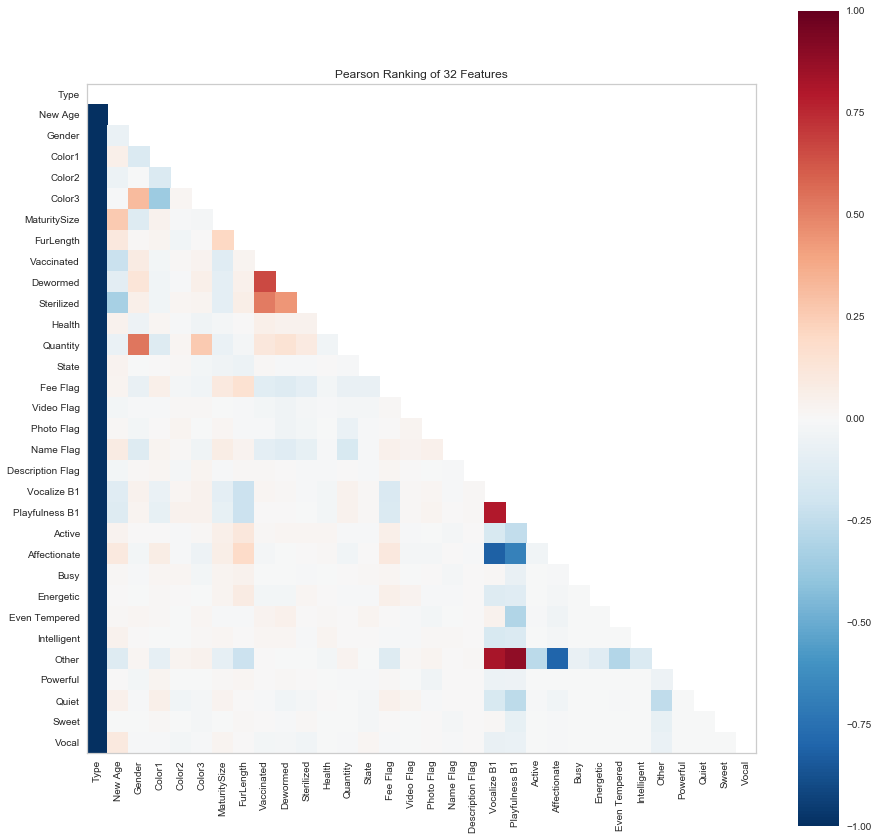

In [120]:
y_cat = pd_model_cat_dummies[['AdoptionSpeed']]
X_cat=pd_model_cat_dummies.drop(['AdoptionSpeed','Adopted Flag'],axis=1)

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', size=(1080, 1080))

visualizer.fit(X_cat, y_cat)
visualizer.transform(X_cat)
visualizer.poof()

## Missing values have been processed and now the dataset has been processed, we will split the data into training and testing for the models.

In [121]:
y_dog = pd_model_dog_dummies[['AdoptionSpeed']]
#X_dog = pd_model_dog_dummies[['Type','New Age','Gender','Color1','Color2','Color3','MaturitySize','FurLength','Vaccinated','Dewormed','Sterilized', 'Health','Quantity','State','Fee Flag','Video Flag','Photo Flag','Photo Flag','Name Flag','Description Flag','Calm','Energetic','Needs a Lot of Activity','Other','Regular Exercise']]
X_dog=pd_model_dog_dummies.drop(['AdoptionSpeed'],axis=1)
X_dog=X_dog.drop(['Adopted Flag'],axis=1)
X_dog.head()

,Type,New Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,State,Fee Flag,Video Flag,Photo Flag,Name Flag,Description Flag,Calm,Energetic,Needs a Lot of Activity,Other,Regular Exercise
2,1,1,1,2,7,0,2,2,1,1,2,1,1,41326,0,0,1,1,1,0,0,0,1,0
3,1,4,2,1,2,0,2,1,1,1,2,1,1,41401,1,0,1,1,1,0,0,0,1,0
4,1,1,1,1,0,0,2,1,2,2,2,1,1,41326,0,0,1,1,1,0,0,0,1,0
7,1,0,2,1,2,7,2,1,2,2,2,1,6,41326,0,0,1,1,1,0,0,0,1,0
10,1,2,1,1,2,7,2,1,2,1,2,1,1,41401,0,0,1,1,1,0,0,0,1,0


### Edits on the x-variables: create dummy for all variables that has more than two tiers: state, Maturity Size, FurLength, 

In [122]:
pd_model_dog_dummies.head()

,Type,New Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,State,Fee Flag,Adopted Flag,Video Flag,Photo Flag,Name Flag,Description Flag,AdoptionSpeed,Calm,Energetic,Needs a Lot of Activity,Other,Regular Exercise
2,1,1,1,2,7,0,2,2,1,1,2,1,1,41326,0,1,0,1,1,1,3,0,0,0,1,0
3,1,4,2,1,2,0,2,1,1,1,2,1,1,41401,1,1,0,1,1,1,2,0,0,0,1,0
4,1,1,1,1,0,0,2,1,2,2,2,1,1,41326,0,1,0,1,1,1,2,0,0,0,1,0
7,1,0,2,1,2,7,2,1,2,2,2,1,6,41326,0,1,0,1,1,1,3,0,0,0,1,0
10,1,2,1,1,2,7,2,1,2,1,2,1,1,41401,0,1,0,1,1,1,1,0,0,0,1,0


In [123]:
pd_model_cat_dummies.head()

,Type,New Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,State,Fee Flag,Adopted Flag,Video Flag,Photo Flag,Name Flag,Description Flag,Vocalize B1,Playfulness B1,AdoptionSpeed,Active,Affectionate,Busy,Energetic,Even Tempered,Intelligent,Other,Powerful,Quiet,Sweet,Vocal
0,2,3,1,1,7,0,1,1,2,2,2,1,1,41326,1,1,0,1,1,1,99,99,2,0,0,0,0,0,0,1,0,0,0,0
1,2,1,1,1,2,0,2,2,3,3,3,1,1,41401,0,1,0,1,1,1,99,99,0,0,0,0,0,0,0,1,0,0,0,0
5,2,3,2,5,6,0,2,1,2,2,2,1,1,41326,0,1,0,1,0,1,99,99,2,0,0,0,0,0,0,1,0,0,0,0
6,2,12,1,1,0,0,2,3,2,2,3,1,1,41326,1,1,0,1,1,1,99,99,1,0,0,0,0,0,0,1,0,0,0,0
8,2,2,2,6,0,0,2,2,2,2,2,1,1,41326,0,1,0,1,0,1,99,99,1,0,0,0,0,0,0,1,0,0,0,0


In [124]:
dum_train_dog= pd.get_dummies(pd_model_dog_dummies,columns=['Gender','Sterilized', 'MaturitySize','Color1','Color2','Color3','FurLength','Vaccinated','Dewormed','Health','State'])
dum_train_dog.head()

,Type,New Age,Quantity,Fee Flag,Adopted Flag,Video Flag,Photo Flag,Name Flag,Description Flag,AdoptionSpeed,Calm,Energetic,Needs a Lot of Activity,Other,Regular Exercise,Gender_1,Gender_2,Gender_3,Sterilized_1,Sterilized_2,Sterilized_3,MaturitySize_1,MaturitySize_2,MaturitySize_3,MaturitySize_4,Color1_1,Color1_2,Color1_3,Color1_4,Color1_5,Color1_6,Color1_7,Color2_0,Color2_2,Color2_3,Color2_4,Color2_5,Color2_6,Color2_7,Color3_0,Color3_3,Color3_4,Color3_5,Color3_6,Color3_7,FurLength_1,FurLength_2,FurLength_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Health_1,Health_2,Health_3,State_41324,State_41325,State_41326,State_41327,State_41330,State_41332,State_41335,State_41336,State_41342,State_41345,State_41361,State_41367,State_41401,State_41415
2,1,1,1,0,1,0,1,1,1,3,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,4,1,1,1,0,1,1,1,2,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,1,0,1,0,1,1,1,2,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,1,0,6,0,1,0,1,1,1,3,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10,1,2,1,0,1,0,1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [125]:
dum_train_cat= pd.get_dummies(pd_model_cat_dummies,columns=['Gender','Sterilized', 'MaturitySize','Color1','Color2','Color3','FurLength','Vaccinated','Dewormed','Health','State'])
dum_train_cat.head()

,Type,New Age,Quantity,Fee Flag,Adopted Flag,Video Flag,Photo Flag,Name Flag,Description Flag,Vocalize B1,Playfulness B1,AdoptionSpeed,Active,Affectionate,Busy,Energetic,Even Tempered,Intelligent,Other,Powerful,Quiet,Sweet,Vocal,Gender_1,Gender_2,Gender_3,Sterilized_1,Sterilized_2,Sterilized_3,MaturitySize_1,MaturitySize_2,MaturitySize_3,MaturitySize_4,Color1_1,Color1_2,Color1_3,Color1_4,Color1_5,Color1_6,Color1_7,Color2_0,Color2_2,Color2_3,Color2_4,Color2_5,Color2_6,Color2_7,Color3_0,Color3_3,Color3_4,Color3_5,Color3_6,Color3_7,FurLength_1,FurLength_2,FurLength_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Health_1,Health_2,Health_3,State_41324,State_41325,State_41326,State_41327,State_41330,State_41332,State_41335,State_41336,State_41342,State_41345,State_41361,State_41367,State_41401,State_41415
0,2,3,1,1,1,0,1,1,1,99,99,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,1,0,1,1,1,99,99,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,2,3,1,0,1,0,1,0,1,99,99,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,2,12,1,1,1,0,1,1,1,99,99,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,2,2,1,0,1,0,1,0,1,99,99,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Let's run random forest on dataset that include new dummy variables. 

#### For dog

In [126]:
y_dog_new=dum_train_dog['AdoptionSpeed']
X_dog_new=dum_train_dog.drop(['AdoptionSpeed','Adopted Flag'],axis=1)

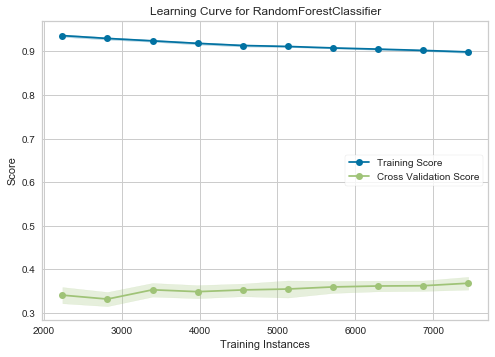

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

X = X_dog_new
y = y_dog_new

# Create the learning curve visualizer
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    RandomForestClassifier(), cv=cv, train_sizes=sizes,
    scoring='f1_weighted', n_jobs=4
)

# Fit and poof the visualizer
viz.fit(X, y)
viz.poof()

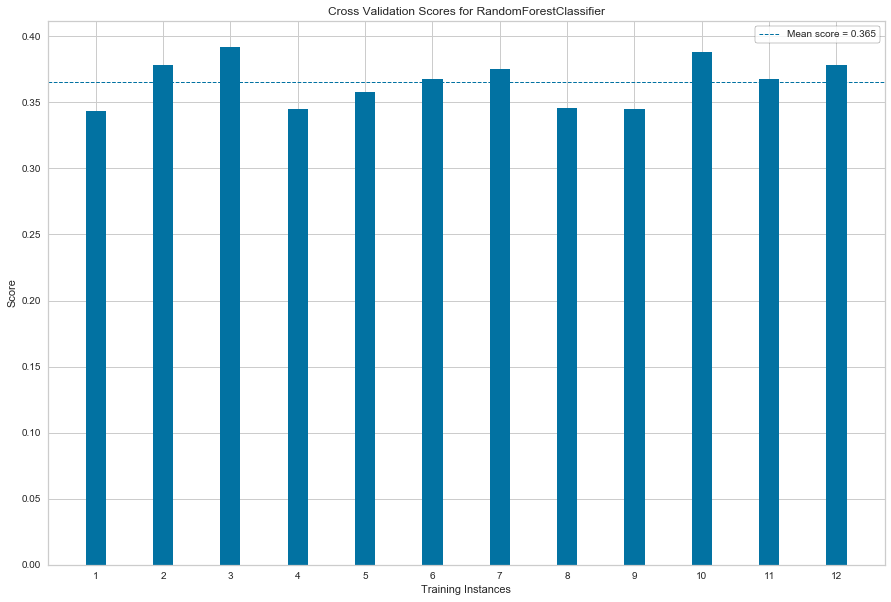

In [128]:
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import CVScores

# Load the classification data set

X = X_dog_new
y = y_dog_new


# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = RandomForestClassifier()
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X, y)
visualizer.poof()

In [130]:
from sklearn.model_selection import train_test_split
X_train_dog_new, X_test_dog_new, y_train_dog_new, y_test_dog_new = train_test_split(X_dog_new, y_dog_new, test_size=0.3)
print('X_train Shape:', X_train_dog_new.shape)
print('X_test Shape:', X_test_dog_new.shape)
print('y_train Shape:', y_train_dog_new.shape)
print('y_test Shape:', y_test_dog_new.shape)

X_train Shape: (5692, 69)
X_test Shape: (2440, 69)
y_train Shape: (5692,)
y_test Shape: (2440,)


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report, accuracy_score, confusion_matrix
%matplotlib inline

# empty list that will hold accuracy scores
acc_sc = []
acc_sc_train = []
for i in range(1,50):
    random_forest = RandomForestClassifier(n_estimators=i,n_jobs=-1)
    random_forest.fit(X_train_dog_new, y_train_dog_new.values.ravel())
    pred_dog_rf_n = random_forest.predict(X_test_dog_new)
    acc = accuracy_score(y_test_dog_new, pred_dog_rf_n)
    acc_sc.append(acc)
    pred_dog_rf_train = random_forest.predict(X_train_dog_new)
    acc_train = accuracy_score(y_train_dog_new, pred_dog_rf_train)
    acc_sc_train.append(acc_train)
print("Accuracy Score {}".format(acc_sc))

Accuracy Score [0.3012295081967213, 0.31926229508196724, 0.32868852459016396, 0.33975409836065573, 0.35737704918032787, 0.35737704918032787, 0.3495901639344262, 0.3495901639344262, 0.3676229508196721, 0.3569672131147541, 0.3680327868852459, 0.369672131147541, 0.37540983606557377, 0.3737704918032787, 0.36885245901639346, 0.380327868852459, 0.38524590163934425, 0.3836065573770492, 0.38278688524590165, 0.3860655737704918, 0.3877049180327869, 0.37663934426229506, 0.38114754098360654, 0.3790983606557377, 0.3831967213114754, 0.3815573770491803, 0.3815573770491803, 0.3848360655737705, 0.38073770491803277, 0.3864754098360656, 0.3762295081967213, 0.3877049180327869, 0.3844262295081967, 0.37581967213114753, 0.3864754098360656, 0.3848360655737705, 0.39057377049180325, 0.3897540983606557, 0.385655737704918, 0.3790983606557377, 0.3709016393442623, 0.38524590163934425, 0.3889344262295082, 0.3885245901639344, 0.39795081967213114, 0.39221311475409837, 0.39877049180327867, 0.3877049180327869, 0.4045081

In [132]:
print("Accuracy Score {}".format(acc_sc_train))

Accuracy Score [0.7108222066057625, 0.7111735769501054, 0.8072733661278988, 0.8448699929725931, 0.8671820098383697, 0.8810611384399156, 0.8877371749824314, 0.8959943780744906, 0.9035488404778637, 0.9098735066760365, 0.9118060435699227, 0.9126844694307801, 0.9153197470133521, 0.9154954321855235, 0.9170765987350668, 0.9177793394237527, 0.9191848208011244, 0.9191848208011244, 0.9193605059732959, 0.9188334504567814, 0.9197118763176388, 0.9205903021784961, 0.9205903021784961, 0.9205903021784961, 0.9207659873506676, 0.9209416725228391, 0.9211173576950106, 0.9209416725228391, 0.9207659873506676, 0.9211173576950106, 0.9214687280393534, 0.9214687280393534, 0.9207659873506676, 0.9209416725228391, 0.9211173576950106, 0.9214687280393534, 0.9214687280393534, 0.9209416725228391, 0.921293042867182, 0.921293042867182, 0.9214687280393534, 0.9214687280393534, 0.921293042867182, 0.9214687280393534, 0.9211173576950106, 0.921293042867182, 0.921293042867182, 0.9214687280393534, 0.921293042867182]


# Plot the number of estimator vs accuracy score

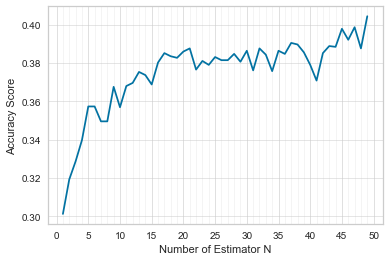

In [133]:
myList_dog_new = list(range(1,50))

# subsetting just the odd ones
neighbors_dog_new = list(filter(lambda x: x % 2 != 0, myList_dog_new))

# determining best k
#optimal_k = neighbors_dog_new[acc_sc.index(max(acc_sc))]
#print ("The optimal number of neighbors is %d" % optimal_k)



# plot accuracy score vs k
plt.plot(myList_dog_new, acc_sc)
plt.xlabel('Number of Estimator N')
plt.ylabel('Accuracy Score')

#format the axis
#fig = plt.figure()
ax = plt.subplot(1, 1, 1)

major_ticks = np.arange(0, 51, 5)
minor_ticks = np.arange(0, 51, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

#my_xticks_dog=range(1,50,1)
#my_xticks_dog = ['1', '3', '5', '7','9','11','13','15','17','19','21','23','25','27','31','33','35','37','39','41','43','45','47','49','51']
#plt.xticks(myList_dog_new, my_xticks_dog)
plt.show()

In [134]:
!pip install yellowbrick

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


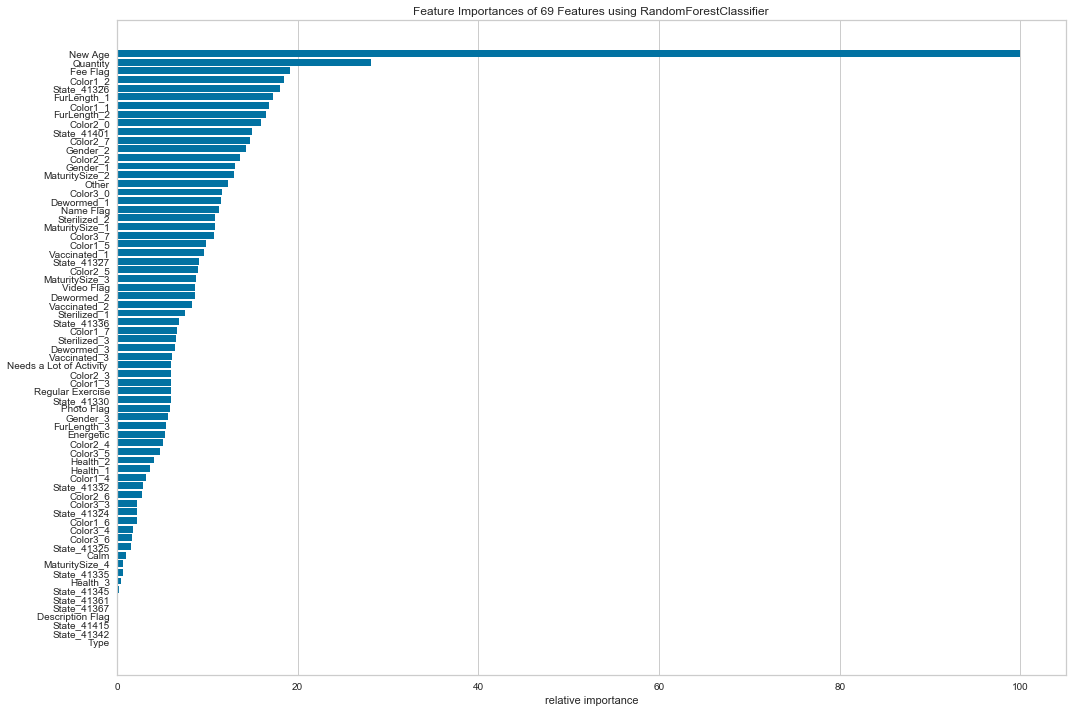

              precision    recall  f1-score   support

           0       0.16      0.06      0.08        53
           1       0.30      0.30      0.30       424
           2       0.33      0.37      0.35       640
           3       0.31      0.27      0.29       588
           4       0.52      0.55      0.53       735

   micro avg       0.38      0.38      0.38      2440
   macro avg       0.32      0.31      0.31      2440
weighted avg       0.37      0.38      0.38      2440



In [135]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances

random_forest = RandomForestClassifier(n_estimators=22,n_jobs=-1)
random_forest.fit(X_train_dog_new, y_train_dog_new.values.ravel())
pred_dog_rf = random_forest.predict(X_test_dog_new)
viz = FeatureImportances(random_forest, size=(1080, 720))

viz.fit(X_train_dog_new, y_train_dog_new)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.poof()

from sklearn.metrics import classification_report
print(classification_report(y_test_dog_new, pred_dog_rf))

### For cat

In [136]:
y_cat_new=dum_train_cat['AdoptionSpeed']
X_cat_new=dum_train_cat.drop(['AdoptionSpeed','Adopted Flag'],axis=1)

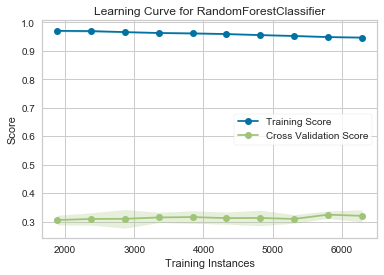

In [137]:
X_cat = X_cat_new
y_cat = y_cat_new

# Create the learning curve visualizer
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    RandomForestClassifier(), cv=cv, train_sizes=sizes,
    scoring='f1_weighted', n_jobs=4
)

# Fit and poof the visualizer
viz.fit(X_cat, y_cat)
viz.poof()

In [138]:
X_train_cat_new, X_test_cat_new, y_train_cat_new, y_test_cat_new = train_test_split(X_cat_new, y_cat_new, test_size=0.3)
print('X_train Shape:', X_train_cat_new.shape)
print('X_test Shape:', X_test_cat_new.shape)
print('y_train Shape:', y_train_cat_new.shape)
print('y_test Shape:', y_test_cat_new.shape)

X_train Shape: (4802, 77)
X_test Shape: (2059, 77)
y_train Shape: (4802,)
y_test Shape: (2059,)


In [139]:
# empty list that will hold accuracy scores
acc_cat_sc = []

for i in range(1,50):
    random_forest = RandomForestClassifier(n_estimators=i,n_jobs=-1)
    random_forest.fit(X_train_cat_new, y_train_cat_new.values.ravel())
    pred = random_forest.predict(X_test_cat_new)
    acc_cat = accuracy_score(y_test_cat_new, pred)
    acc_cat_sc.append(acc_cat)
print("Accuracy Score {}".format(acc_cat_sc))

Accuracy Score [0.29480330257406506, 0.2651772705196697, 0.277804759592035, 0.29577464788732394, 0.2986886838271005, 0.32005828071879555, 0.3103448275862069, 0.3258863525983487, 0.30354541039339483, 0.3132588635259835, 0.31277319086935407, 0.32345798931520153, 0.3190869354055367, 0.3195726080621661, 0.32102962603205437, 0.32831471588149586, 0.3244293346284604, 0.3186012627489072, 0.33365711510441964, 0.3302574065080136, 0.32734337056823704, 0.32345798931520153, 0.3312287518212725, 0.32637202525497816, 0.3244293346284604, 0.32005828071879555, 0.33559980573093734, 0.3312287518212725, 0.3380281690140845, 0.33365711510441964, 0.32734337056823704, 0.3312287518212725, 0.3394851869839728, 0.32637202525497816, 0.3224866440019427, 0.3312287518212725, 0.3186012627489072, 0.33268576979116077, 0.3365711510441962, 0.32685769791160757, 0.3370568237008256, 0.32734337056823704, 0.3365711510441962, 0.3322000971345313, 0.3423992229237494, 0.3224866440019427, 0.33851384167071397, 0.32977173385138414, 0.3

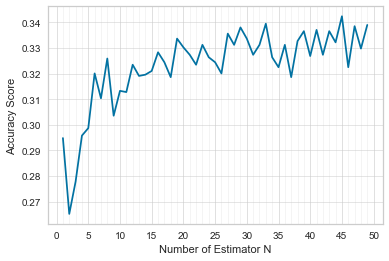

In [140]:
myList_cat_new = list(range(1,50))

# subsetting just the odd ones
neighbors_dog_new = list(filter(lambda x: x % 2 != 0, myList_dog_new))

# determining best k
#optimal_k = neighbors_dog_new[acc_sc.index(max(acc_sc))]
#print ("The optimal number of neighbors is %d" % optimal_k)



# plot accuracy score vs k
plt.plot(myList_cat_new, acc_cat_sc)
plt.xlabel('Number of Estimator N')
plt.ylabel('Accuracy Score')

#format the axis
#fig = plt.figure()
ax = plt.subplot(1, 1, 1)

major_ticks = np.arange(0, 51, 5)
minor_ticks = np.arange(0, 51, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()

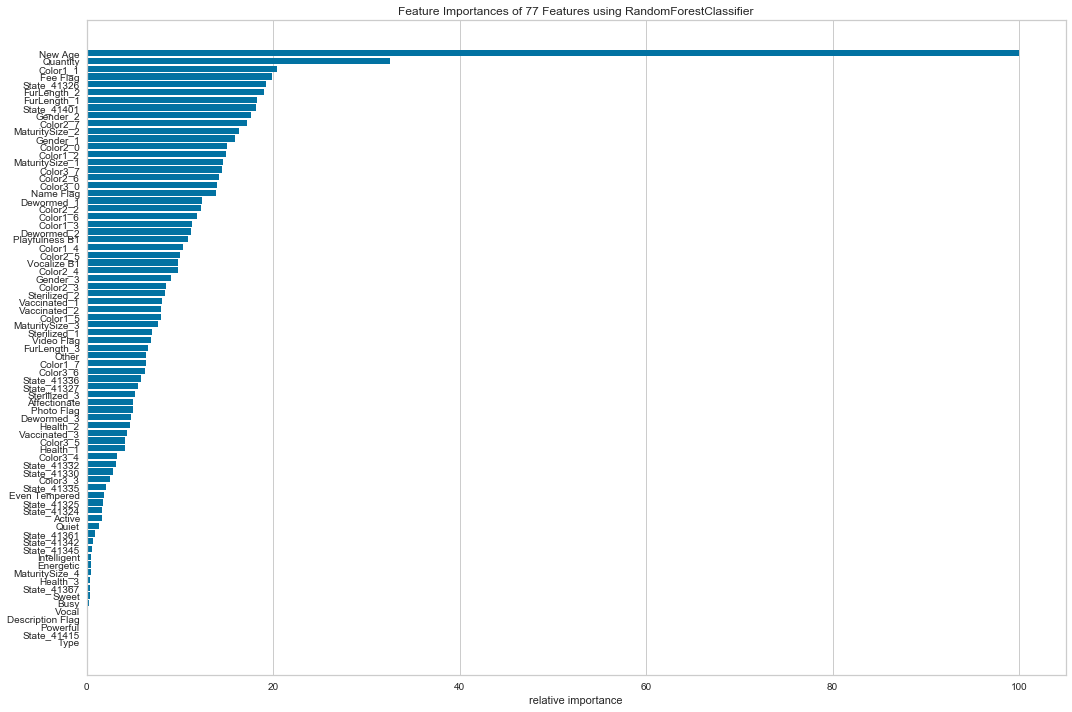

              precision    recall  f1-score   support

           0       0.17      0.05      0.08        78
           1       0.33      0.34      0.33       501
           2       0.32      0.35      0.34       566
           3       0.23      0.18      0.20       392
           4       0.45      0.50      0.47       522

   micro avg       0.34      0.34      0.34      2059
   macro avg       0.30      0.29      0.29      2059
weighted avg       0.33      0.34      0.34      2059



In [142]:
random_forest = RandomForestClassifier(n_estimators=38,n_jobs=-1)
random_forest.fit(X_train_cat_new, y_train_cat_new.values.ravel())
pred_cat_rf = random_forest.predict(X_test_cat_new)
viz = FeatureImportances(random_forest, size=(1080, 720))

viz.fit(X_train_cat_new, y_train_cat_new)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.poof()

print(classification_report(y_test_cat_new, pred_cat_rf))

### Another test on KNN.

#### For dog

In [143]:
from sklearn import preprocessing

In [144]:
X_dog_KNN_new= preprocessing.StandardScaler().fit(X_dog_new).transform(X_dog_new.astype(float))
X_dog_KNN_new[0:5]

/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.        , -0.59626763, -0.34294371, -0.41423316, -0.19874334,
         0.15633108,  0.29449944,  0.01921065, -0.07705618, -0.26083054,
        -0.29103358,  0.55973877, -0.3161636 ,  1.30619922, -1.0468411 ,
        -0.34723658, -0.54134218,  0.75651335, -0.39903662, -0.42073208,
         0.57204902, -0.32108065, -0.05208359, -0.97043202,  1.43467508,
        -0.20952909, -0.13661868, -0.27712966, -0.10872135, -0.21615772,
        -0.7617457 , -0.63485162, -0.19264634, -0.1636083 , -0.28928999,
        -0.12443679,  2.05659476,  0.51601569, -0.10519279, -0.09712859,
        -0.18245816, -0.08099517, -0.42214833, -1.17734882,  1.298307  ,
        -0.22140372,  1.04015636, -0.76841115, -0.41748776,  0.81507491,
        -0.58643849, -0.40892161,  0.19126895, -0.18389243, -0.05088297,
        -0.1039912 , -0.08401681,  0.81361298, -0.28502491, -0.20501153,
        -0.13331247, -0.06479635, -0.18813818, -0.01568447, -0.02480389,
        -0.01921065, -0.01921065, -0.51161831, -0.0

In [145]:
from sklearn.model_selection import train_test_split
X_train_dog_new_knn, X_test_dog_new_knn, y_train_dog_new_knn, y_test_dog_new_knn = train_test_split(X_dog_new, y_dog_new, test_size=0.3)
print('X_train Shape:', X_train_dog_new_knn.shape,y_train_dog_new_knn.shape)
print('X_test Shape:', X_test_dog_new_knn.shape,y_test_dog_new_knn.shape)

X_train Shape: (5692, 69) (5692,)
X_test Shape: (2440, 69) (2440,)


In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [147]:
from sklearn.model_selection import cross_val_score
myList_dog_new = list(range(1,20))

# subsetting just the odd ones
neighbors_dog_new = list(filter(lambda x: x % 2 != 0, myList_dog_new))

# empty list that will hold cv scores
cv_scores_dog_new = []

# perform 10-fold cross validation
for k in neighbors_dog_new:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_dog_new_knn, y_train_dog_new_knn.values.ravel(), cv=10, scoring='accuracy')
    cv_scores_dog_new.append(scores.mean())

The optimal number of neighbors is 17


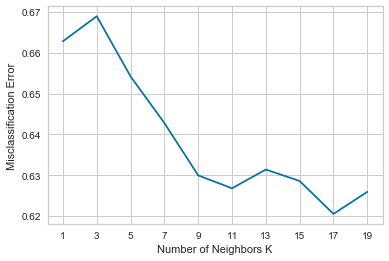

In [148]:
MSE_dog_new = [1 - x for x in cv_scores_dog_new]

# determining best k
optimal_k = neighbors_dog_new[MSE_dog_new.index(min(MSE_dog_new))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors_dog_new, MSE_dog_new)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
my_xticks_dog = ['1', '3', '5', '7','9','11','13','15','17','19']
plt.xticks(neighbors_dog_new, my_xticks_dog)
plt.show()

In [149]:
from yellowbrick.features.importances import FeatureImportances

k = 17
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train_dog_new_knn,y_train_dog_new_knn.values.ravel())

yhat = neigh.predict(X_test_dog_new_knn)

#KNN doesn't have feature_importances_ feature so can't run FeatureImportances
#viz = FeatureImportances(neigh, size=(1080, 720))
#viz.fit(X_train_dog_new_knn, y_train_dog_new_knn)
#viz.poof()

from sklearn.metrics import classification_report
print(classification_report(y_test_dog_new_knn, yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.27      0.20      0.23       429
           2       0.30      0.34      0.32       679
           3       0.27      0.24      0.26       571
           4       0.46      0.55      0.50       709

   micro avg       0.35      0.35      0.35      2440
   macro avg       0.26      0.27      0.26      2440
weighted avg       0.33      0.35      0.33      2440



#### For cat

In [150]:
X_cat_KNN_new= preprocessing.StandardScaler().fit(X_cat_new).transform(X_cat_new.astype(float))
X_cat_KNN_new[0:5]

/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.        , -0.3830353 , -0.45614918,  2.24136231, -0.20043918,
         0.14796807,  0.31182259,  0.03624204,  0.37901886,  0.40550363,
        -0.11133223, -0.32733564, -0.03195781, -0.04983902, -0.12099851,
        -0.06047404,  0.40967034, -0.02091519, -0.10441838, -0.03416683,
        -0.02700534,  1.30797028, -0.88802132, -0.48464545, -0.47383813,
         0.63148773, -0.33653608,  1.46929908, -1.24788304, -0.28036404,
        -0.04007293,  0.98481144, -0.43483498, -0.31097775, -0.27580156,
        -0.21531992, -0.30644647, -0.21531992, -0.52557367, -0.40748437,
        -0.25503316, -0.32569572, -0.28036404, -0.39819756,  1.62593165,
         0.80037653, -0.11266644, -0.13454953, -0.15203167, -0.22299014,
        -0.63939782,  0.82460331, -0.71780117, -0.26304222, -0.63962404,
         0.79401875, -0.32651631, -1.02374787,  1.22862113, -0.31406832,
         0.18540115, -0.17986185, -0.04357022, -0.08568002, -0.08823241,
         0.89196594, -0.18707682, -0.11658204, -0.1

In [151]:
X_train_cat_new_knn, X_test_cat_new_knn, y_train_cat_new_knn, y_test_cat_new_knn = train_test_split(X_cat_new, y_cat_new, test_size=0.3)
print('X_train Shape:', X_train_cat_new_knn.shape,y_train_cat_new_knn.shape)
print('X_test Shape:', X_test_cat_new_knn.shape,y_test_cat_new_knn.shape)

X_train Shape: (4802, 77) (4802,)
X_test Shape: (2059, 77) (2059,)


In [152]:
from sklearn.model_selection import cross_val_score
myList_cat_new = list(range(1,30))

# subsetting just the odd ones
neighbors_cat_new = list(filter(lambda x: x % 2 != 0, myList_cat_new))

# empty list that will hold cv scores
cv_scores_cat_new = []

# perform 10-fold cross validation
for k in neighbors_cat_new:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_cat_new_knn, y_train_cat_new_knn.values.ravel(), cv=10, scoring='accuracy')
    cv_scores_cat_new.append(scores.mean())

The optimal number of neighbors is 25


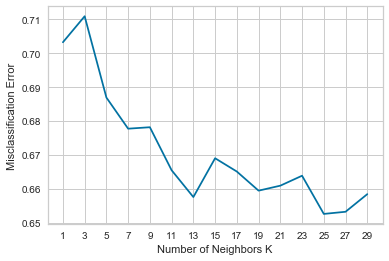

In [153]:
MSE_cat_new = [1 - x for x in cv_scores_cat_new]

# determining best k
optimal_k = neighbors_cat_new[MSE_cat_new.index(min(MSE_cat_new))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors_cat_new, MSE_cat_new)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
my_xticks_cat = ['1', '3', '5', '7','9','11','13','15','17','19','21','23','25','27','29','31']
plt.xticks(neighbors_cat_new, my_xticks_cat)
plt.show()

In [154]:
k = 17
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train_cat_new_knn,y_train_cat_new_knn.values.ravel())

yhat_cat = neigh.predict(X_test_cat_new_knn)

#KNN doesn't have feature_importances_ feature so can't run FeatureImportances
#viz = FeatureImportances(neigh, size=(1080, 720))
#viz.fit(X_train_dog_new_knn, y_train_dog_new_knn)
#viz.poof()

from sklearn.metrics import classification_report
print(classification_report(y_test_cat_new_knn, yhat_cat))

              precision    recall  f1-score   support

           0       0.20      0.01      0.03        69
           1       0.29      0.42      0.35       488
           2       0.32      0.34      0.33       580
           3       0.20      0.09      0.12       404
           4       0.43      0.45      0.44       518

   micro avg       0.33      0.33      0.33      2059
   macro avg       0.29      0.26      0.25      2059
weighted avg       0.31      0.33      0.31      2059



### XGBoost 

#### For dog

In [155]:
!pip install xgboost

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [156]:
from xgboost import XGBClassifier
import xgboost as xgb

In [157]:
from sklearn.metrics import  classification_report, accuracy_score, confusion_matrix
%matplotlib inline

# empty list that will hold accuracy scores
acc_sc = []
acc_sc_train = []
for i in range(1,10):
    xgb = XGBClassifier(max_depth=i,n_estimators=100,learning_rate = 0.01)
    xgb.fit(X_train_dog_new, y_train_dog_new)
    pred_dog_xgb = xgb.predict(X_test_dog_new)
    acc = accuracy_score(y_test_dog_new,pred_dog_xgb)
    acc_sc.append(acc)
    pred_dog_xgb_train = xgb.predict(X_train_dog_new)
    acc_train = accuracy_score(y_train_dog_new, pred_dog_xgb_train)
    acc_sc_train.append(acc_train)
print("Accuracy Score Validation{}".format(acc_sc))

Accuracy Score Validation[0.3729508196721312, 0.40491803278688526, 0.4065573770491803, 0.4057377049180328, 0.39262295081967213, 0.3823770491803279, 0.3889344262295082, 0.38401639344262295, 0.3844262295081967]


In [158]:
print("Accuracy Score Train{}".format(acc_sc_train))

Accuracy Score Train[0.3696416022487702, 0.3995080815179199, 0.4125087842586086, 0.429550245959241, 0.4650386507378777, 0.49964862965565704, 0.5368938861560084, 0.5739634574841883, 0.6117357695010541]


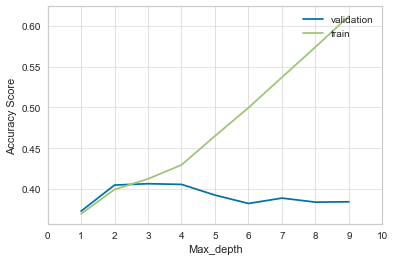

In [159]:
myList_dog_new = list(range(1,10))


neighbors_dog_new = list(filter(lambda x: x % 2 != 0, myList_dog_new))


plt.plot(myList_dog_new, acc_sc,label='validation')
plt.plot(myList_dog_new, acc_sc_train,label='train')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy Score')

#format the axis
#fig = plt.figure()
ax = plt.subplot(1, 1, 1)
leg = ax.legend()
ax.legend(loc='upper right')
major_ticks = np.arange(0, 11, 1)
minor_ticks = np.arange(0, 11, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()

#### From here, we could see that max_depth 8 has the hightest accuracy score. So we will run the model using 8 as max_depth.

In [160]:
xgb = XGBClassifier(max_depth=8,n_estimators=100,learning_rate = 0.01)
xgb.fit(X_train_dog_new, y_train_dog_new)
pred_dog_xgb = xgb.predict(X_test_dog_new)

#### Feature importance based on the best max_depth

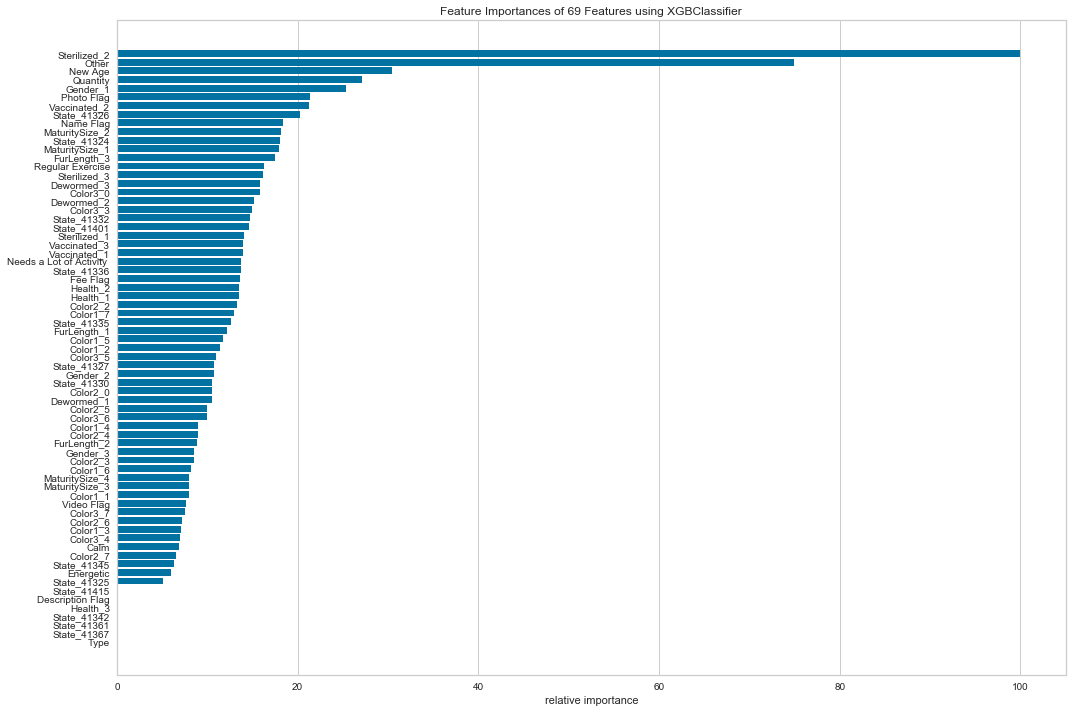

              precision    recall  f1-score   support

           0       0.08      0.02      0.03        53
           1       0.29      0.28      0.28       424
           2       0.32      0.38      0.35       640
           3       0.34      0.19      0.24       588
           4       0.49      0.64      0.56       735

   micro avg       0.38      0.38      0.38      2440
   macro avg       0.31      0.30      0.29      2440
weighted avg       0.37      0.38      0.37      2440



In [161]:
from yellowbrick.features import FeatureImportances

viz = FeatureImportances(XGBClassifier(), size=(1080, 720))

viz.fit(X_train_dog_new, y_train_dog_new)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.poof()

from sklearn.metrics import classification_report
print(classification_report(y_test_dog_new, pred_dog_xgb))

In [162]:
#y_pred_xgb_dog = xgb_dog.predict(X_test_dog_new)
predictions = [round(value) for value in pred_dog_xgb]
accuracy_xgb_dog = accuracy_score(y_test_dog_new, predictions)
print("Accuracy: %.2f%%" % (accuracy_xgb_dog * 100.0))

Accuracy: 38.40%


#### For cat

In [163]:
from sklearn.metrics import  classification_report, accuracy_score, confusion_matrix
%matplotlib inline

# empty list that will hold accuracy scores
acc_sc_cat = []
acc_sc_train_cat = []
for i in range(1,10):
    xgb = XGBClassifier(max_depth=i,n_estimators=100,learning_rate = 0.01)
    xgb.fit(X_train_cat_new, y_train_cat_new)
    pred_cat_xgb = xgb.predict(X_test_cat_new)
    acc_cat = accuracy_score(y_test_cat_new,pred_cat_xgb)
    acc_sc_cat.append(acc_cat)
    pred_cat_xgb_train = xgb.predict(X_train_cat_new)
    acc_train_cat = accuracy_score(y_train_cat_new, pred_cat_xgb_train)
    acc_sc_train_cat.append(acc_train_cat)
print("Accuracy Score Validation{}".format(acc_sc_cat))

Accuracy Score Validation[0.33851384167071397, 0.3623118018455561, 0.36668285575522097, 0.37251092763477417, 0.36668285575522097, 0.3593977659057795, 0.35988343856240895, 0.3579407479358912, 0.3642544924720738]


In [164]:
print("Accuracy Score Train{}".format(acc_sc_train_cat))

Accuracy Score Train[0.34631403581840897, 0.3713036234902124, 0.3898375676801333, 0.40503956684714704, 0.43440233236151604, 0.4662640566430654, 0.49916701374427325, 0.5408163265306123, 0.5889212827988338]


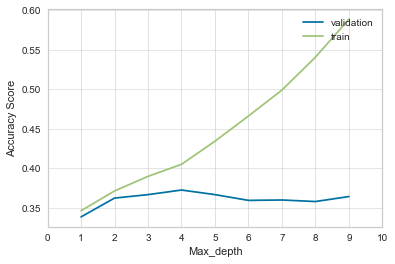

In [165]:
myList_cat_new = list(range(1,10))


neighbors_cat_new = list(filter(lambda x: x % 2 != 0, myList_cat_new))


plt.plot(myList_cat_new, acc_sc_cat,label='validation')
plt.plot(myList_cat_new, acc_sc_train_cat,label='train')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy Score')

#format the axis
#fig = plt.figure()
ax = plt.subplot(1, 1, 1)
leg = ax.legend()
ax.legend(loc='upper right')
major_ticks = np.arange(0, 11, 1)
minor_ticks = np.arange(0, 11, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()

#### For cat, the best max_depth is 3. So we will run the model based on 3.

In [166]:
xgb = XGBClassifier(max_depth=3,n_estimators=100,learning_rate = 0.01)
xgb.fit(X_train_cat_new, y_train_cat_new)
pred_cat_xgb = xgb.predict(X_test_cat_new)

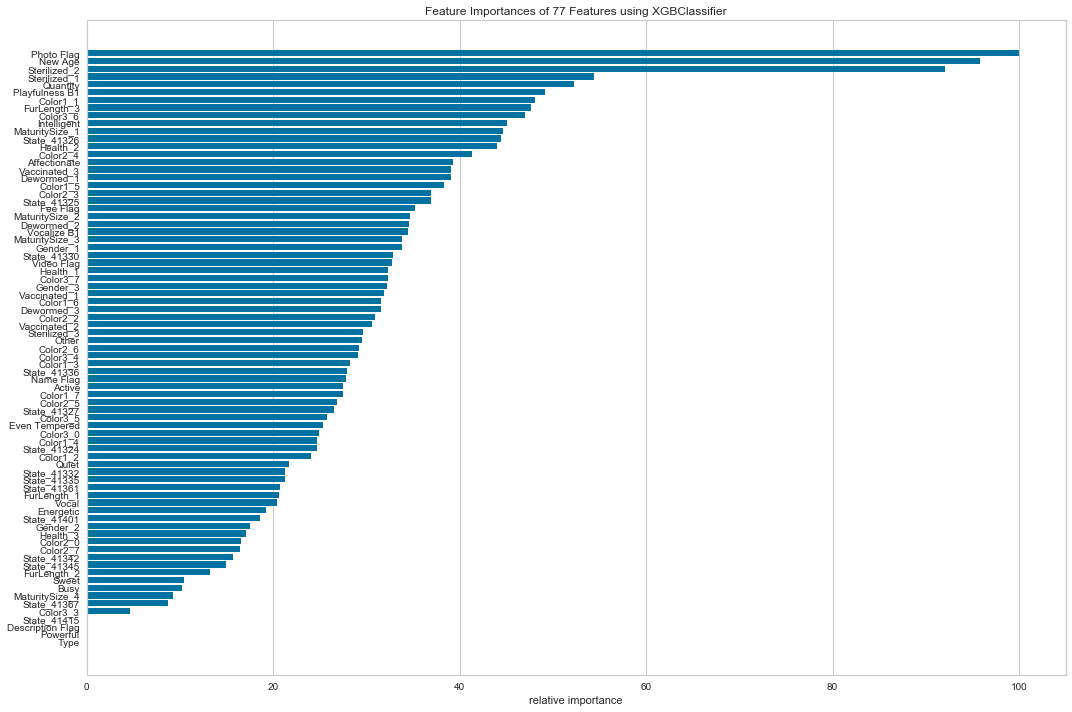

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.35      0.38      0.36       501
           2       0.32      0.38      0.35       566
           3       0.33      0.00      0.01       392
           4       0.41      0.67      0.51       522

   micro avg       0.37      0.37      0.37      2059
   macro avg       0.28      0.29      0.25      2059
weighted avg       0.34      0.37      0.31      2059



/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [167]:
#from yellowbrick.features import FeatureImportances
viz = FeatureImportances(XGBClassifier(), size=(1080, 720))

viz.fit(X_train_cat_new, y_train_cat_new)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.poof()

from sklearn.metrics import classification_report
print(classification_report(y_test_cat_new, pred_cat_xgb))

In [172]:
#y_pred_xgb_dog = xgb_dog.predict(X_test_dog_new)
predictions_cat = [round(value) for value in pred_cat_xgb]
accuracy_xgb_cat = accuracy_score(y_test_cat_new, predictions_cat)
print("Accuracy: %.2f%%" % (accuracy_xgb_cat * 100.0))

Accuracy: 36.67%


### SVC

In [173]:
from sklearn.svm import SVC
from numpy import arange

#### For dog

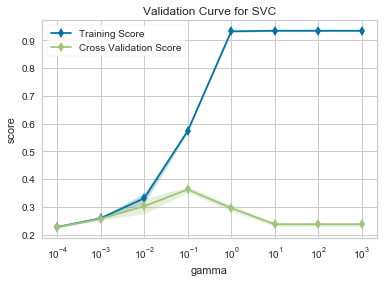

In [174]:
from yellowbrick.model_selection import ValidationCurve

# Create the validation curve visualizer
#param_range = np.logspace(-4,3,num=8,base=10,dtype='int')
param_range = [0.0001,0.001,0.01,0.1,1,10,100,1000]

# perform 10-fold cross validation
viz = ValidationCurve(
    SVC(kernel='rbf'), param_name="gamma", param_range=param_range,
    logx=True, cv=3, scoring="f1_weighted", n_jobs=8,
)

viz.fit(X_train_dog_new, y_train_dog_new)
viz.poof()

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

param_range = [0.0001,0.001,0.01,0.1,1,10,100,1000]
#param_range = np.logspace(-3, 3, 12)
tuned_params = [{'gamma': param_range}]
n_folds = 3

grid = GridSearchCV(
    svc, tuned_params, cv=n_folds
)

grid.fit(X_train_dog_new, y_train_dog_new)
print(grid.best_estimator_)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### So we can see that the best gamma is 0.1. We will run the svc model on gamma=0.1

In [176]:
svc = SVC(gamma=0.1,kernel='rbf')
svc.fit(X_train_dog_new, y_train_dog_new)
pred_dog_svc = svc.predict(X_test_dog_new)

##### RBF SVC doesn't have feature_importance_, so can't produce feature importance rank. We skip this step for SVC, and rely on the feature importance from other models.

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test_dog_new, pred_dog_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.33      0.18      0.24       424
           2       0.35      0.45      0.39       640
           3       0.33      0.17      0.22       588
           4       0.48      0.71      0.57       735

   micro avg       0.40      0.40      0.40      2440
   macro avg       0.30      0.30      0.29      2440
weighted avg       0.37      0.40      0.37      2440



/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### For cat

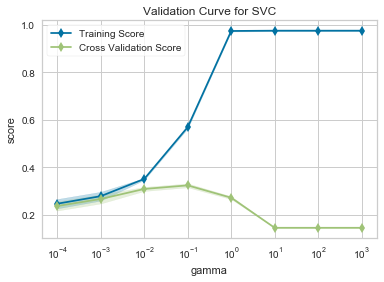

In [178]:
# Create the validation curve visualizer
param_range = [0.0001,0.001,0.01,0.1,1,10,100,1000]

# perform 10-fold cross validation
viz = ValidationCurve(
    SVC(kernel='rbf'), param_name="gamma", param_range=param_range,
    logx=True, cv=3, scoring="f1_weighted", n_jobs=8,
)

viz.fit(X_train_cat_new, y_train_cat_new)
viz.poof()

#### So we could see that gamma=0.1 has the best accuracy, so we will run the model with gamma=0.1

In [179]:
svc = SVC(gamma=0.1,kernel='rbf')
svc.fit(X_train_cat_new, y_train_cat_new)
pred_cat_svc = svc.predict(X_test_cat_new)

In [180]:

from sklearn.metrics import classification_report
print(classification_report(y_test_cat_new, pred_cat_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.35      0.41      0.38       501
           2       0.33      0.37      0.35       566
           3       0.32      0.06      0.11       392
           4       0.43      0.62      0.51       522

   micro avg       0.37      0.37      0.37      2059
   macro avg       0.29      0.29      0.27      2059
weighted avg       0.35      0.37      0.34      2059



/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Time to run the ROC plot on all models. (For dog)

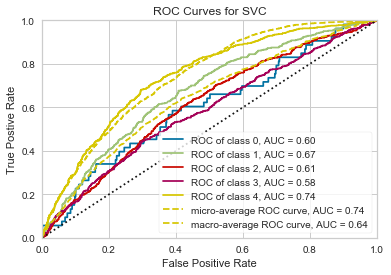

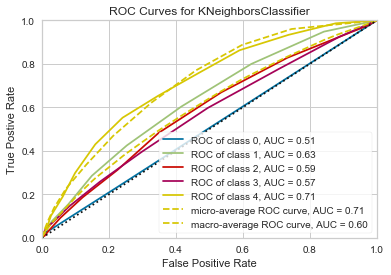

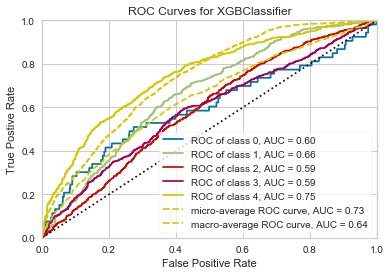

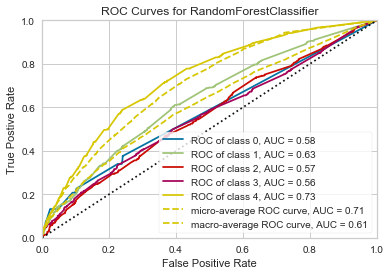

In [181]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from yellowbrick.classifier import ROCAUC

classifiers = {
    "SVC": SVC(gamma=0.1,kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors = 15),
    "XGB": XGBClassifier(max_depth=8,n_estimators=100,learning_rate = 0.01),
    "Random Forest": RandomForestClassifier(n_estimators=22,n_jobs=-1),
}

for _, classifier in classifiers.items():
    visualizer = ROCAUC(classifier)
    visualizer.fit(X_train_dog_new, y_train_dog_new)
    visualizer.score(X_test_dog_new, y_test_dog_new)
    visualizer.poof()


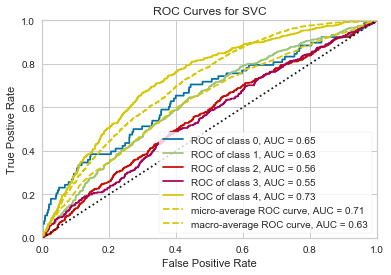

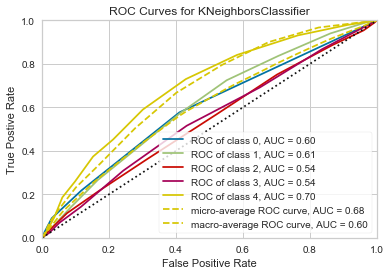

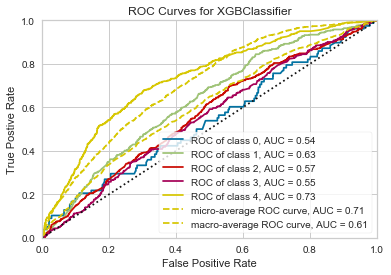

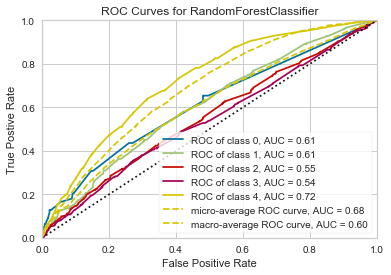

In [182]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from yellowbrick.classifier import ROCAUC

classifiers_cat = {
    "SVC": SVC(gamma=0.1,kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors = 17),
    "XGB": XGBClassifier(max_depth=3,n_estimators=100,learning_rate = 0.01),
    "Random Forest": RandomForestClassifier(n_estimators=38,n_jobs=-1),
}

for _, classifier in classifiers_cat.items():
    visualizer = ROCAUC(classifier)
    visualizer.fit(X_train_cat_new, y_train_cat_new)
    visualizer.score(X_test_cat_new, y_test_cat_new)
    visualizer.poof()

#### Compare F1 in all models.

##### Micro- and macro-averages (for whatever metric) will compute slightly different things, and thus their interpretation differs. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

###  So, in our project, we are using Micro F1 Score, since there are imbalance in our multi-classes

In [183]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
def score_model(X_train, y_train, X_test, y_test, estimator, **kwargs):
    """
    Test various estimators.
    """ 
    #y = LabelEncoder().fit_transform(y)
    #model = Pipeline([
     #    ('one_hot_encoder', OneHotEncoder()), 
      #   ('estimator', estimator)
    #])

    # Instantiate the classification model and visualizer
    #model.fit(X, y, **kwargs)  
    model = Pipeline([ 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train, **kwargs)  
    expected  = y_test
    predicted = model.predict(X_test)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted,average='micro')))

#### For dog

In [184]:
models_dog = [
    SVC(gamma=0.1,kernel='rbf'), 
    KNeighborsClassifier(n_neighbors = 15),  
    RandomForestClassifier(n_estimators=22,n_jobs=-1),
    XGBClassifier(max_depth=8,n_estimators=100,learning_rate = 0.01)
]

for model in models_dog:
    score_model(X_train_dog_new, y_train_dog_new, X_test_dog_new, y_test_dog_new, model)

SVC: 0.40368852459016386
KNeighborsClassifier: 0.37418032786885247
RandomForestClassifier: 0.3782786885245902
XGBClassifier: 0.3840163934426229


#### So we can see, for dog, XGB is the best.
#### Now, we are doing a GridSearch to fine tune the XGBooting model

In [190]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.model_selection import KFold

grid_xgb = XGBClassifier()
param_dist = {'n_estimators': stats.randint(100, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

#numFolds = 5
#kfold_5 = KFold(n = len(X), shuffle = True, n_folds = numFolds)
kfold_5 = KFold(n_splits=5)

grid = RandomizedSearchCV(grid_xgb, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 5, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'f1_micro', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

grid.fit(X_train_dog_new, y_train_dog_new)
print("Best parameters set found on development set:")
print()
print(grid.best_estimator_)
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test_dog_new, grid.predict(X_test_dog_new)
print(classification_report(y_true, y_pred))
print()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.5min finished


Best parameters set found on development set:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7240479433838432, gamma=0,
       learning_rate=0.5733893996498625, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=910, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5005714590414037, verbosity=1)

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.09      0.06      0.07        53
           1       0.28      0.25      0.26       424
           2       0.34      0.37      0.36       640
           3       0.30      0.28      0.29       588
           4       0.51      0.53      0.52       735

   micro avg  

#### For cats

In [189]:
models_cat = [
    SVC(gamma=0.1,kernel='rbf'), 
    KNeighborsClassifier(n_neighbors = 17),  
    RandomForestClassifier(n_estimators=38,n_jobs=-1),
    XGBClassifier(max_depth=3,n_estimators=100,learning_rate = 0.01)
]

for model in models_cat:
    score_model(X_train_cat_new, y_train_cat_new, X_test_cat_new, y_test_cat_new, model)

SVC: 0.3720252549781447
KNeighborsClassifier: 0.32831471588149586
RandomForestClassifier: 0.33268576979116077
XGBClassifier: 0.36668285575522097


#### It seems that SVC is the best performing model based on f-1 score. Will do a randomized grid search on SVC model

In [188]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'],
                     'gamma': [0.1, 1, 10],
                     'C': [1, 10, 100]},
                    ]

#numFolds = 5
#kfold_5 = KFold(n = len(X), shuffle = True, n_folds = numFolds)
kfold_5 = KFold(n_splits=5)

#scores = ['f1_micro', 'roc_auc']
scores = ['f1_micro']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    grid = GridSearchCV(SVC(), tuned_parameters, cv=3, scoring='%s' % score)

    grid.fit(X_train_cat_new, y_train_cat_new)
    print("Best parameters set found on development set:")
    print()
    print(grid.best_estimator_)
    print()
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_cat_new, grid.predict(X_test_cat_new)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for f1_micro

Best parameters set found on development set:

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.35      0.41      0.38       501
           2       0.33      0.37      0.35       566
           3       0.32      0.06      0.11       392
           4       0.43      0.62      0.51       522

   micro avg       0.37      0.37      0.37      2059
   macro avg       0.29      0.29      0.27      2059
weighted avg       0.35      0.37      0.34      2059




/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
